In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# import libraries
import bq_helper
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

set_matplotlib_formats('retina')
%matplotlib inline

from google.cloud import bigquery
client = bigquery.Client()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Using Kaggle's public dataset BigQuery integration.


/tmp/ipykernel_20/440648437.py:12: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



In [4]:
query = """
    select 
        *
    from
        `bigquery-public-data.google_analytics_sample.ga_sessions_*`
    limit 10
"""
query_job_00 = client.query(query)
high_level_00 = query_job_00.to_dataframe()
high_level_00

,visitorId,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,customDimensions,hits,fullVisitorId,userId,clientId,channelGrouping,socialEngagementType
0,NaN,1,1476867563,1476867563,20161019,"{'visits': 1, 'hits': 15, 'pageviews': 14, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Europe', 'subContinent': 'North...","[{'index': 4, 'value': 'EMEA'}]","[{'hitNumber': 1, 'time': 0, 'hour': 1, 'minut...",4896405720571090441,None,None,Organic Search,Not Socially Engaged
1,NaN,1,1476868365,1476868365,20161019,"{'visits': 1, 'hits': 15, 'pageviews': 13, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Europe', 'subContinent': 'South...","[{'index': 4, 'value': 'EMEA'}]","[{'hitNumber': 1, 'time': 0, 'hour': 2, 'minut...",180151471893873873,None,None,Organic Search,Not Socially Engaged
2,NaN,1,1476907981,1476907981,20161019,"{'visits': 1, 'hits': 15, 'pageviews': 14, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Safari', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 13, 'minu...",88941951040469453,None,None,Paid Search,Not Socially Engaged
3,NaN,1,1476890338,1476890338,20161019,"{'visits': 1, 'hits': 15, 'pageviews': 12, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 8, 'minut...",1906518679195483558,None,None,Organic Search,Not Socially Engaged
4,NaN,1,1476939468,1476939468,20161019,"{'visits': 1, 'hits': 15, 'pageviews': 9, 'tim...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 21, 'minu...",1261766213410309440,None,None,Organic Search,Not Socially Engaged
5,NaN,1,1476905593,1476905593,20161019,"{'visits': 1, 'hits': 15, 'pageviews': 10, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Europe', 'subContinent': 'Weste...","[{'index': 4, 'value': 'EMEA'}]","[{'hitNumber': 1, 'time': 0, 'hour': 12, 'minu...",9279375370433079615,None,None,Organic Search,Not Socially Engaged
6,NaN,1,1476908560,1476908560,20161019,"{'visits': 1, 'hits': 15, 'pageviews': 14, 'ti...","{'referralPath': '/', 'campaign': '(not set)',...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 13, 'minu...",0126903409267501452,None,None,Referral,Not Socially Engaged
7,NaN,3,1476876990,1476876990,20161019,"{'visits': 1, 'hits': 15, 'pageviews': 12, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Europe', 'subContinent': 'Weste...","[{'index': 4, 'value': 'EMEA'}]","[{'hitNumber': 1, 'time': 0, 'hour': 4, 'minut...",871879602586621578,None,None,Direct,Not Socially Engaged
8,NaN,1,1476886416,1476886416,20161019,"{'visits': 1, 'hits': 15, 'pageviews': 13, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Internet Explorer', 'browserVersi...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 7, 'minut...",7927702929925590120,None,None,Organic Search,Not Socially Engaged
9,NaN,1,1476924444,1476924444,20161019,"{'visits': 1, 'hits': 15, 'pageviews': 11, 'ti...","{'referralPath': '/', 'campaign': '(not set)',...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continen

In [5]:
query = """
    SELECT 
    fullVisitorId, 
    COUNT(visitId) AS visit_count
FROM 
    `bigquery-public-data.google_analytics_sample.ga_sessions_*`
GROUP BY
    fullVisitorId
HAVING
    visit_count > 1
"""
query_job_00 = client.query(query)
high_level_00 = query_job_00.to_dataframe()
high_level_00

,fullVisitorId,visit_count
0,2690535203969679690,60
1,5490104931040203110,17
2,2079305443218957036,45
3,4340944648693399996,11
4,696141035171487036,22
...,...,...
93487,8244242161072306225,9
93488,094198889286992348,9
93489,6607479717607786908,9
93490,4091050686828407823,9


In [6]:
# high level stats 

query = """
    SELECT 
        date,
        count(distinct visitId) as dis_count_visitId,
        count(visitId) as count_visitId,
        count(fullVisitorId) as count_fullVisitorId,
        count(fullVisitorId) / count(distinct visitId) as avg_visit
    FROM 
        `bigquery-public-data.google_analytics_sample.ga_sessions_*`
    WHERE
        _TABLE_SUFFIX BETWEEN '20160801' AND '20160830'
    group by date
    order by date
"""
safe_query_job = client.query(query)
high_level_aug = safe_query_job.to_dataframe()
high_level_aug

,date,dis_count_visitId,count_visitId,count_fullVisitorId,avg_visit
0,20160801,1701,1711,1711,1.005879
1,20160802,2107,2140,2140,1.015662
2,20160803,2849,2890,2890,1.014391
3,20160804,3094,3161,3161,1.021655
4,20160805,2643,2702,2702,1.022323
5,20160806,1650,1663,1663,1.007879
6,20160807,1606,1622,1622,1.009963
7,20160808,2751,2815,2815,1.023264
8,20160809,2797,2851,2851,1.019306
9,20160810,2700,2757,2757,1.021111


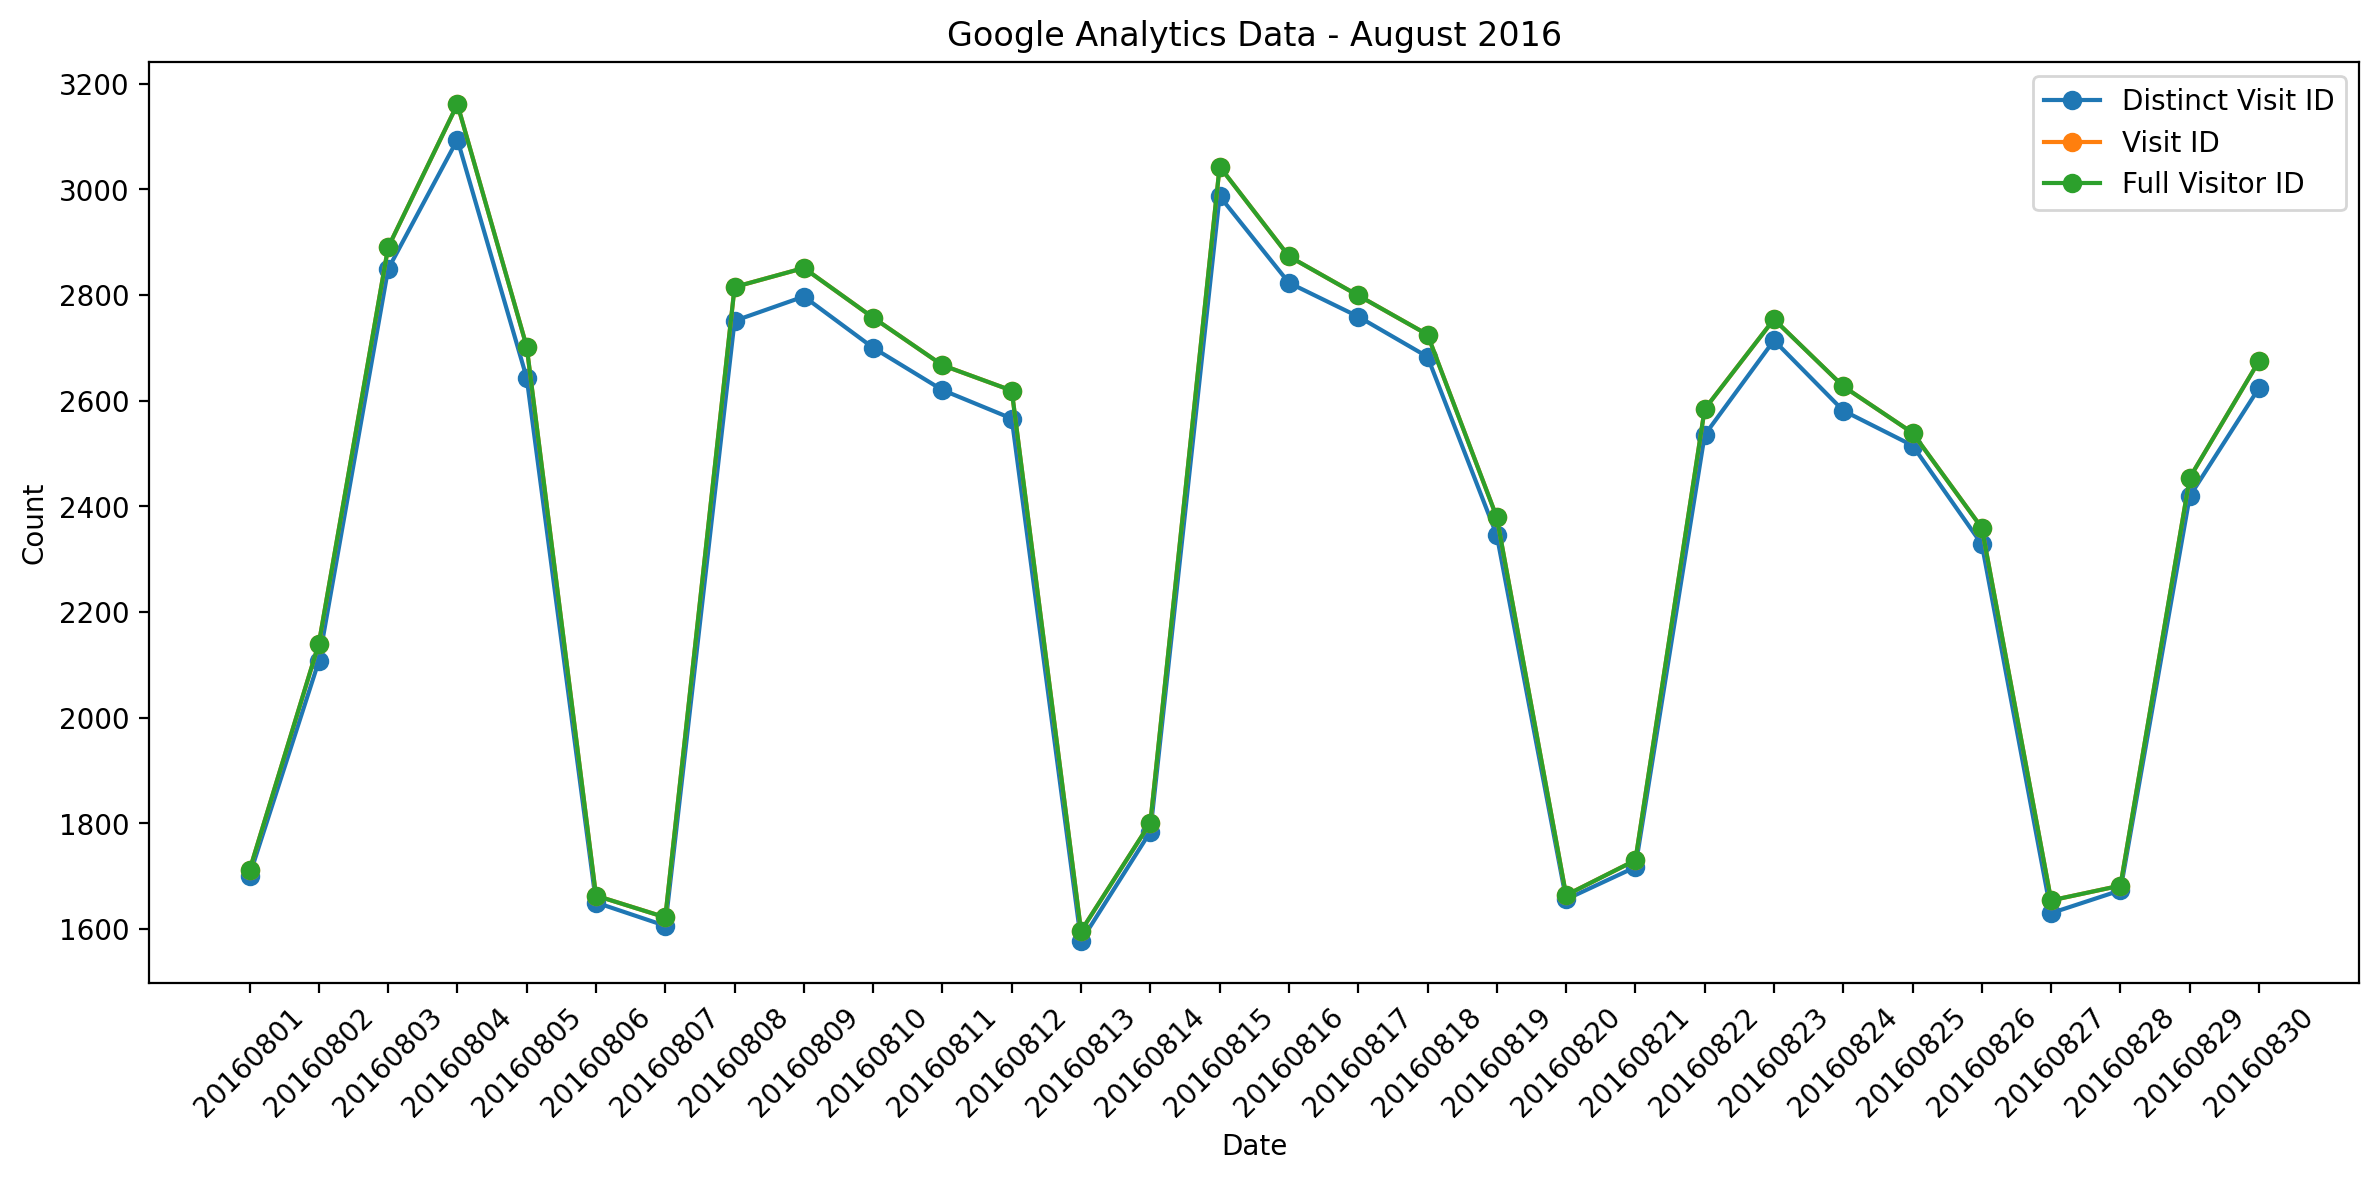

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 그래프 그리기
plt.figure(figsize=(12, 6))

# 각 항목별로 라인 그래프 그리기
plt.plot(high_level_aug['date'], high_level_aug['dis_count_visitId'], marker='o', label='Distinct Visit ID')
plt.plot(high_level_aug['date'], high_level_aug['count_visitId'], marker='o', label='Visit ID')
plt.plot(high_level_aug['date'], high_level_aug['count_fullVisitorId'], marker='o', label='Full Visitor ID')

# 레이블, 제목, 범례 설정
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Google Analytics Data - August 2016')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

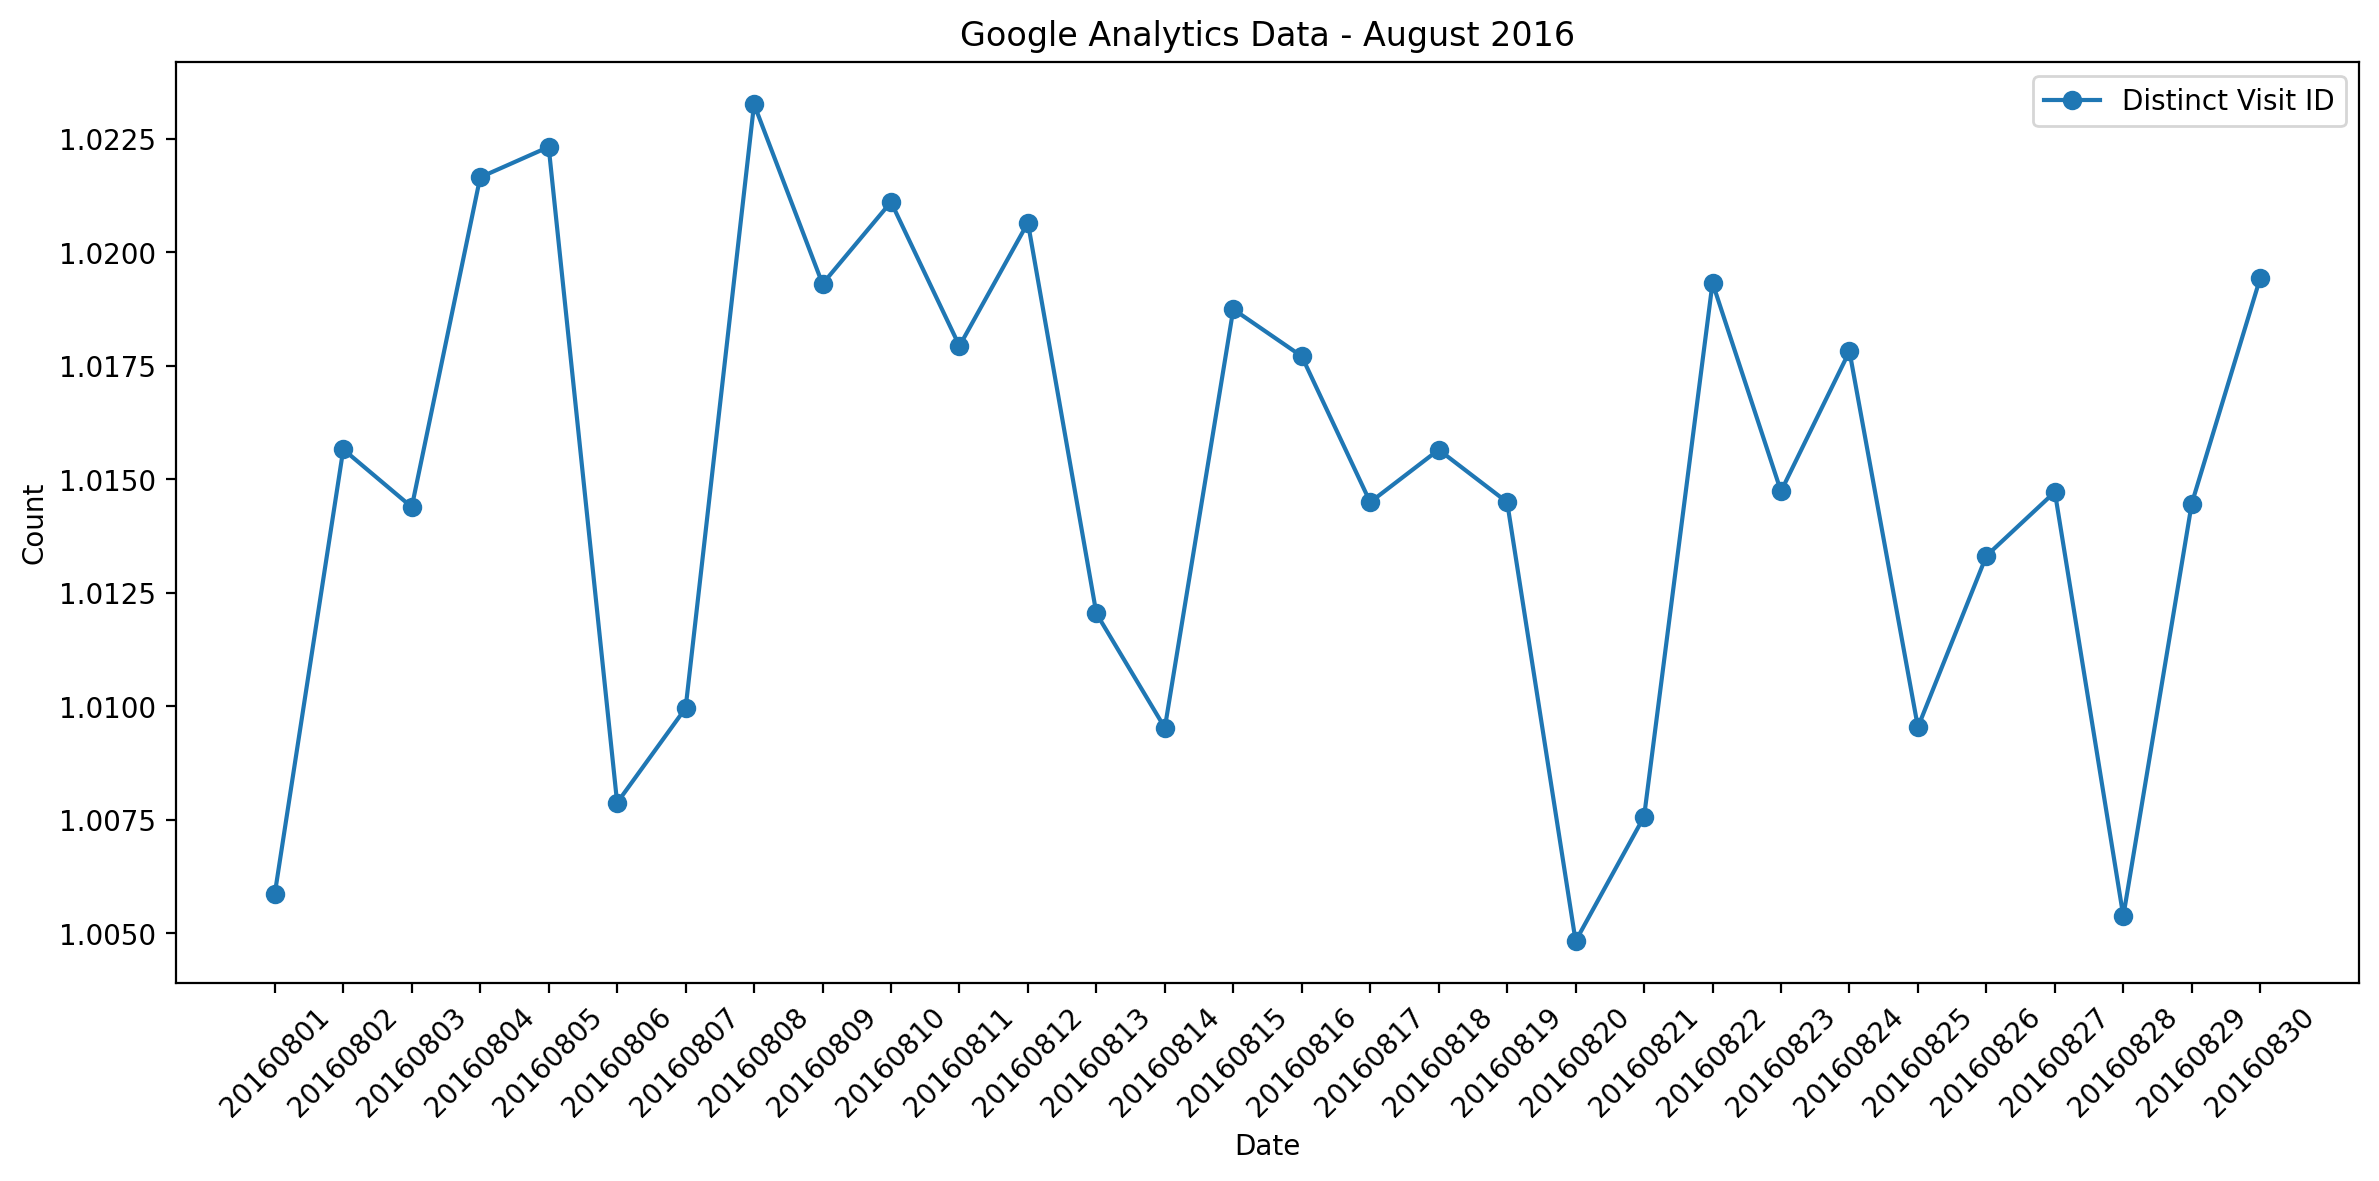

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 그래프 그리기
plt.figure(figsize=(12, 6))

# 각 항목별로 라인 그래프 그리기
plt.plot(high_level_aug['date'], high_level_aug['avg_visit'], marker='o', label='Distinct Visit ID')

# 레이블, 제목, 범례 설정
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Google Analytics Data - August 2016')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

MAU 집계 실습

In [9]:
# high level stats 

# Initialize a BigQuery client
client = bigquery.Client()

# Define your query
mau_query = """
WITH months AS (
    SELECT DATE_ADD(PARSE_DATE('%Y%m%d', "20160801"), INTERVAL n MONTH) AS start_date,
           DATE_ADD(PARSE_DATE('%Y%m%d', "20160831"), INTERVAL n MONTH) AS end_date
    FROM UNNEST(GENERATE_ARRAY(0, 11)) AS n  
)
SELECT
    FORMAT_DATE('%Y-%m', start_date) AS month,
    COUNT(DISTINCT visitId) AS mau
FROM months
JOIN `bigquery-public-data.google_analytics_sample.ga_sessions_*`
ON PARSE_DATE('%Y%m%d', date) BETWEEN start_date AND end_date
GROUP BY month
ORDER BY month;
"""

mau_result = client.query(mau_query).result().to_dataframe()

print(mau_result)

Using Kaggle's public dataset BigQuery integration.
      month     mau
0   2016-08   73494
1   2016-09   69729
2   2016-10   95409
3   2016-11  111201
4   2016-12   77589
5   2017-01   63585
6   2017-02   61122
7   2017-03   68574
8   2017-04   65935
9   2017-05   64217
10  2017-06   62483
11  2017-07   70478


WAU 집

In [10]:
# high level stats 

# Initialize a BigQuery client
client = bigquery.Client()

# Define your query
mau_query = """
WITH weeks AS (
    SELECT DATE_ADD(PARSE_DATE('%Y%m%d', "20160801"), INTERVAL n WEEK) AS start_date,
           DATE_ADD(PARSE_DATE('%Y%m%d', "20160807"), INTERVAL n WEEK) AS end_date
    FROM UNNEST(GENERATE_ARRAY(0, 51)) AS n  -- 52 weeks
)
SELECT
    FORMAT_DATE('%Y-%m-%d', start_date) AS week_start,
    FORMAT_DATE('%Y-%m-%d', end_date) AS week_end,
    COUNT(DISTINCT visitId) AS wau
FROM weeks
JOIN `bigquery-public-data.google_analytics_sample.ga_sessions_*`
ON PARSE_DATE('%Y%m%d', date) BETWEEN start_date AND end_date
GROUP BY week_start, week_end
ORDER BY week_start;
"""

mau_result = client.query(mau_query).result().to_dataframe()

print(mau_result)

Using Kaggle's public dataset BigQuery integration.
    week_start    week_end    wau
0   2016-08-01  2016-08-07  15631
1   2016-08-08  2016-08-14  16780
2   2016-08-15  2016-08-21  16957
3   2016-08-22  2016-08-28  15958
4   2016-08-29  2016-09-04  16743
5   2016-09-05  2016-09-11  15478
6   2016-09-12  2016-09-18  16419
7   2016-09-19  2016-09-25  16553
8   2016-09-26  2016-10-02  16006
9   2016-10-03  2016-10-09  20322
10  2016-10-10  2016-10-16  19199
11  2016-10-17  2016-10-23  23219
12  2016-10-24  2016-10-30  25649
13  2016-10-31  2016-11-06  24826
14  2016-11-07  2016-11-13  24751
15  2016-11-14  2016-11-20  26754
16  2016-11-21  2016-11-27  25407
17  2016-11-28  2016-12-04  27127
18  2016-12-05  2016-12-11  19970
19  2016-12-12  2016-12-18  19538
20  2016-12-19  2016-12-25  14997
21  2016-12-26  2017-01-01  10535
22  2017-01-02  2017-01-08  13847
23  2017-01-09  2017-01-15  13828
24  2017-01-16  2017-01-22  13876
25  2017-01-23  2017-01-29  16164
26  2017-01-30  2017-02-05  14

누적 MAU 집계

In [11]:
# high level stats 

# Initialize a BigQuery client
client = bigquery.Client()

# Define your query
mau_query = """
WITH FirstVisit AS (
    -- Determine the first visit date for each visitor
    SELECT 
        fullVisitorId,
        MIN(DATE(PARSE_DATE('%Y%m%d', date))) AS first_visit_date
    FROM 
        `bigquery-public-data.google_analytics_sample.ga_sessions_*`
    WHERE
        _TABLE_SUFFIX BETWEEN '20160801' AND '20170731'  
    GROUP BY 
        fullVisitorId
),

MonthlyStats AS (
    -- Calculate MAU, New Users and Returning Users
    SELECT 
        DATE_TRUNC(DATE(PARSE_DATE('%Y%m%d', s.date)), MONTH) AS month_start,
        LAST_DAY(DATE(PARSE_DATE('%Y%m%d', s.date)), MONTH) AS month_end,
        COUNT(DISTINCT s.visitId) AS mau,
        COUNT(DISTINCT IF(f.first_visit_date = DATE(PARSE_DATE('%Y%m%d', s.date)), s.fullVisitorId, NULL)) AS new_users,
        COUNT(DISTINCT IF(f.first_visit_date < DATE(PARSE_DATE('%Y%m%d', s.date)), s.fullVisitorId, NULL)) AS returning_users
    FROM 
        `bigquery-public-data.google_analytics_sample.ga_sessions_*` AS s
    JOIN 
        FirstVisit AS f
    ON 
        s.fullVisitorId = f.fullVisitorId
    WHERE
        _TABLE_SUFFIX BETWEEN '20160801' AND '20170731'  
    GROUP BY 
        month_start, month_end
),

CumulativeStats AS (
    -- Calculate Cumulative MAU
    SELECT 
        month_start, 
        month_end, 
        mau,
        new_users,
        returning_users,
        SUM(mau) OVER (ORDER BY month_start) AS cumulative_mau
    FROM 
        MonthlyStats
)

SELECT 
    month_start, 
    month_end, 
    new_users,
    returning_users,
    cumulative_mau
FROM 
    CumulativeStats
ORDER BY 
    month_start;
"""

mau_result = client.query(mau_query).result().to_dataframe()

print(mau_result)

Using Kaggle's public dataset BigQuery integration.
   month_start   month_end  new_users  returning_users  cumulative_mau
0   2016-08-01  2016-08-31      61699             4701           73494
1   2016-09-01  2016-09-30      56481             6046          143223
2   2016-10-01  2016-10-31      81488             7152          238632
3   2016-11-01  2016-11-30      95764             8446          349833
4   2016-12-01  2016-12-31      59378             8765          427422
5   2017-01-01  2017-01-31      49572             6755          491007
6   2017-02-01  2017-02-28      48310             6025          552129
7   2017-03-01  2017-03-31      54709             6678          620703
8   2017-04-01  2017-04-30      52424             6501          686638
9   2017-05-01  2017-05-31      48656             7298          750855
10  2017-06-01  2017-06-30      48673             6668          813338
11  2017-07-01  2017-07-31      55118             7250          883816


DAU MAU 누적 집계

In [12]:
# high level stats 

# Initialize a BigQuery client
client = bigquery.Client()

# Define your query
mau_query = """
WITH DailyMAU AS (
    SELECT
        PARSE_DATE('%Y%m%d', date) AS day,
        COUNT(DISTINCT visitId) AS dau
    FROM 
        `bigquery-public-data.google_analytics_sample.ga_sessions_*`
    WHERE
        _TABLE_SUFFIX BETWEEN '20160801' AND '20160831'  -- Adjust this range as needed
    GROUP BY 
        day
),

CumulativeMAU AS (
    SELECT 
        day, 
        dau,
        SUM(dau) OVER (ORDER BY day ROWS BETWEEN 29 PRECEDING AND CURRENT ROW) AS mau
    FROM 
        DailyMAU
)

SELECT 
    day,
    dau,
    mau
FROM 
    CumulativeMAU
ORDER BY 
    day;
"""

mau_result = client.query(mau_query).result().to_dataframe()

print(mau_result)

Using Kaggle's public dataset BigQuery integration.
           day   dau    mau
0   2016-08-01  1701   1701
1   2016-08-02  2107   3808
2   2016-08-03  2849   6657
3   2016-08-04  3094   9751
4   2016-08-05  2643  12394
5   2016-08-06  1650  14044
6   2016-08-07  1606  15650
7   2016-08-08  2751  18401
8   2016-08-09  2797  21198
9   2016-08-10  2700  23898
10  2016-08-11  2620  26518
11  2016-08-12  2566  29084
12  2016-08-13  1577  30661
13  2016-08-14  1784  32445
14  2016-08-15  2987  35432
15  2016-08-16  2823  38255
16  2016-08-17  2759  41014
17  2016-08-18  2683  43697
18  2016-08-19  2345  46042
19  2016-08-20  1656  47698
20  2016-08-21  1717  49415
21  2016-08-22  2535  51950
22  2016-08-23  2714  54664
23  2016-08-24  2581  57245
24  2016-08-25  2515  59760
25  2016-08-26  2328  62088
26  2016-08-27  1630  63718
27  2016-08-28  1673  65391
28  2016-08-29  2419  67810
29  2016-08-30  2624  70434
30  2016-08-31  3142  71875


## DAU와 MAU를 활용한 분석 - Stickness

In [13]:
# high level stats 

# Initialize a BigQuery client
client = bigquery.Client()

# Define your query
mau_query = """
WITH DailyMAU AS (
    SELECT
        PARSE_DATE('%Y%m%d', date) AS day,
        COUNT(DISTINCT visitId) AS dau
    FROM 
        `bigquery-public-data.google_analytics_sample.ga_sessions_*`
    WHERE
        _TABLE_SUFFIX BETWEEN '20160801' AND '20160831'  -- Adjust this range as needed
    GROUP BY 
        day
),

CumulativeMAU AS (
    SELECT 
        day, 
        dau,
        SUM(dau) OVER (ORDER BY day ROWS BETWEEN 29 PRECEDING AND CURRENT ROW) AS mau
    FROM 
        DailyMAU
)

SELECT 
    day,
    dau,
    mau,
    (dau / mau) * 100 AS stickiness,
    AVG((dau / mau) * 100) OVER() AS average_stickiness
FROM 
    CumulativeMAU
ORDER BY 
    day;
"""

mau_result = client.query(mau_query).result().to_dataframe()

print(mau_result)

Using Kaggle's public dataset BigQuery integration.
           day   dau    mau  stickiness  average_stickiness
0   2016-08-01  1701   1701  100.000000           13.606119
1   2016-08-02  2107   3808   55.330882           13.606119
2   2016-08-03  2849   6657   42.797056           13.606119
3   2016-08-04  3094   9751   31.730079           13.606119
4   2016-08-05  2643  12394   21.324835           13.606119
5   2016-08-06  1650  14044   11.748790           13.606119
6   2016-08-07  1606  15650   10.261981           13.606119
7   2016-08-08  2751  18401   14.950274           13.606119
8   2016-08-09  2797  21198   13.194641           13.606119
9   2016-08-10  2700  23898   11.298017           13.606119
10  2016-08-11  2620  26518    9.880081           13.606119
11  2016-08-12  2566  29084    8.822720           13.606119
12  2016-08-13  1577  30661    5.143342           13.606119
13  2016-08-14  1784  32445    5.498536           13.606119
14  2016-08-15  2987  35432    8.430233         

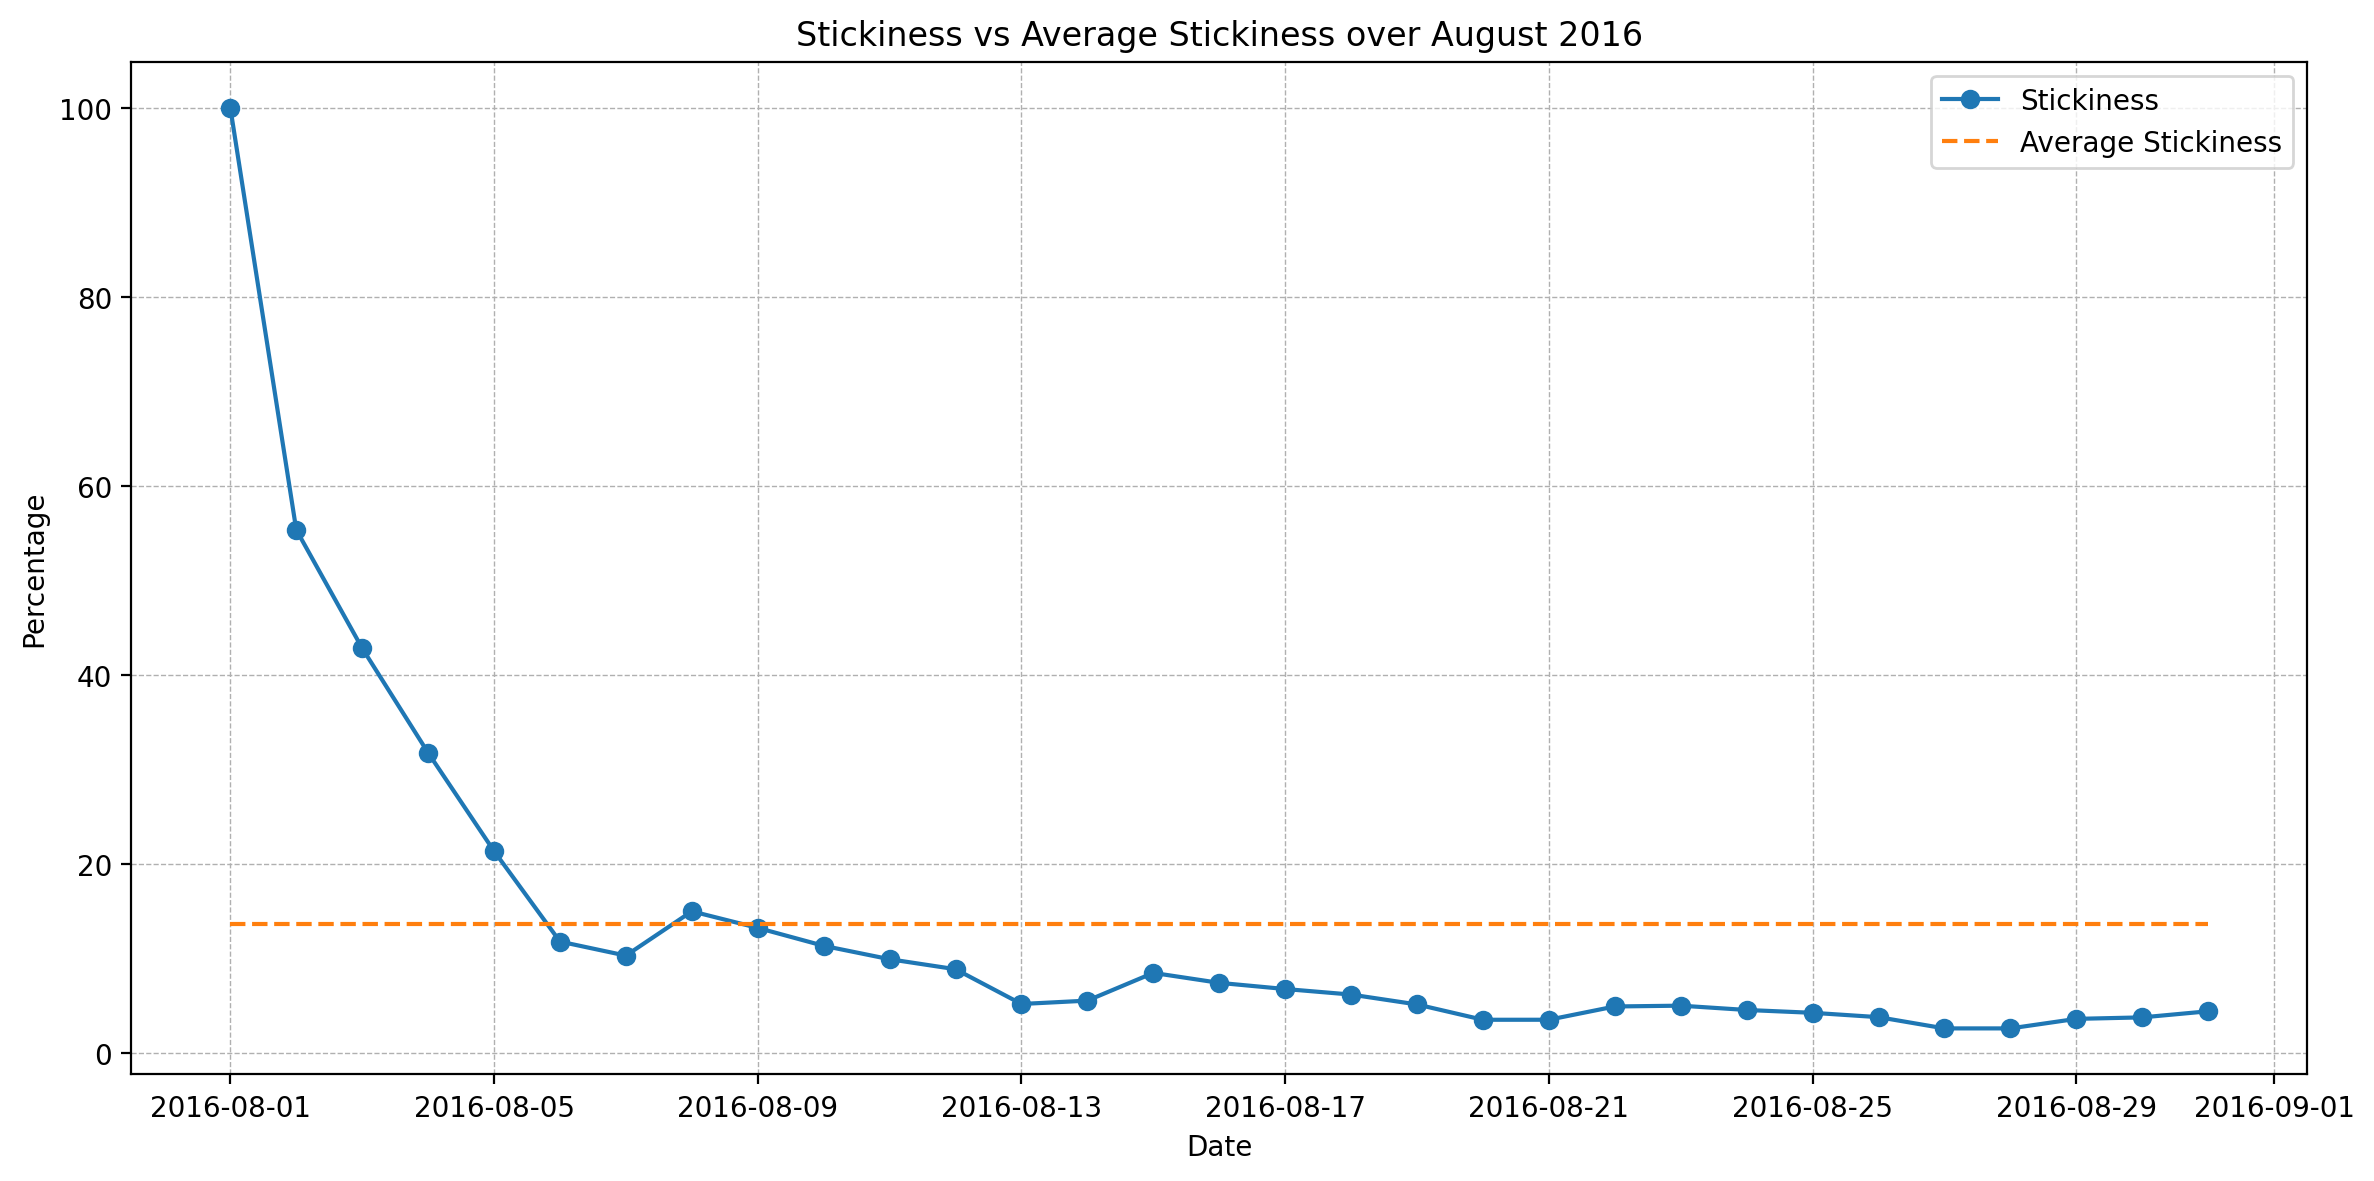

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(mau_result['day'], mau_result['stickiness'], label='Stickiness', marker='o')
plt.plot(mau_result['day'], mau_result['average_stickiness'], label='Average Stickiness', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.title('Stickiness vs Average Stickiness over August 2016')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

## 사용자별 접속 횟수별 분포집계

In [15]:
# high level stats 

# Initialize a BigQuery client
client = bigquery.Client()

# Define your query
mau_query = """
WITH UserVisits AS (
    -- Count visits per user for the given period
    SELECT
        fullVisitorId,
        COUNT(*) AS visit_count
    FROM 
        `bigquery-public-data.google_analytics_sample.ga_sessions_*`
    WHERE
        _TABLE_SUFFIX BETWEEN '20160801' AND '20160831'  -- Adjust this range as needed
    GROUP BY 
        fullVisitorId
),

VisitBuckets AS (
    -- Categorize users based on visit count
    SELECT
        CASE
            WHEN visit_count = 1 THEN "1 visit"
            WHEN visit_count BETWEEN 2 AND 3 THEN "2-3 visits"
            WHEN visit_count BETWEEN 4 AND 7 THEN "4-7 visits"
            WHEN visit_count BETWEEN 8 AND 14 THEN "8-14 visits"
            WHEN visit_count BETWEEN 15 AND 28 THEN "15-28 visits"
            ELSE "28+ visits"
        END AS visit_bucket,
        COUNT(DISTINCT fullVisitorId) AS user_count
    FROM 
        UserVisits
    GROUP BY 
        visit_bucket
)

SELECT 
    visit_bucket,
    user_count
FROM 
    VisitBuckets
ORDER BY 
    CASE 
        WHEN visit_bucket = "1 visit" THEN 1
        WHEN visit_bucket = "2-3 visits" THEN 2
        WHEN visit_bucket = "4-7 visits" THEN 3
        WHEN visit_bucket = "8-14 visits" THEN 4
        WHEN visit_bucket = "15-28 visits" THEN 5
        ELSE 6
    END;
"""

mau_result = client.query(mau_query).result().to_dataframe()

print(mau_result)

Using Kaggle's public dataset BigQuery integration.
   visit_bucket  user_count
0       1 visit       54610
1    2-3 visits        5965
2    4-7 visits         937
3   8-14 visits         146
4  15-28 visits          32
5    28+ visits           9


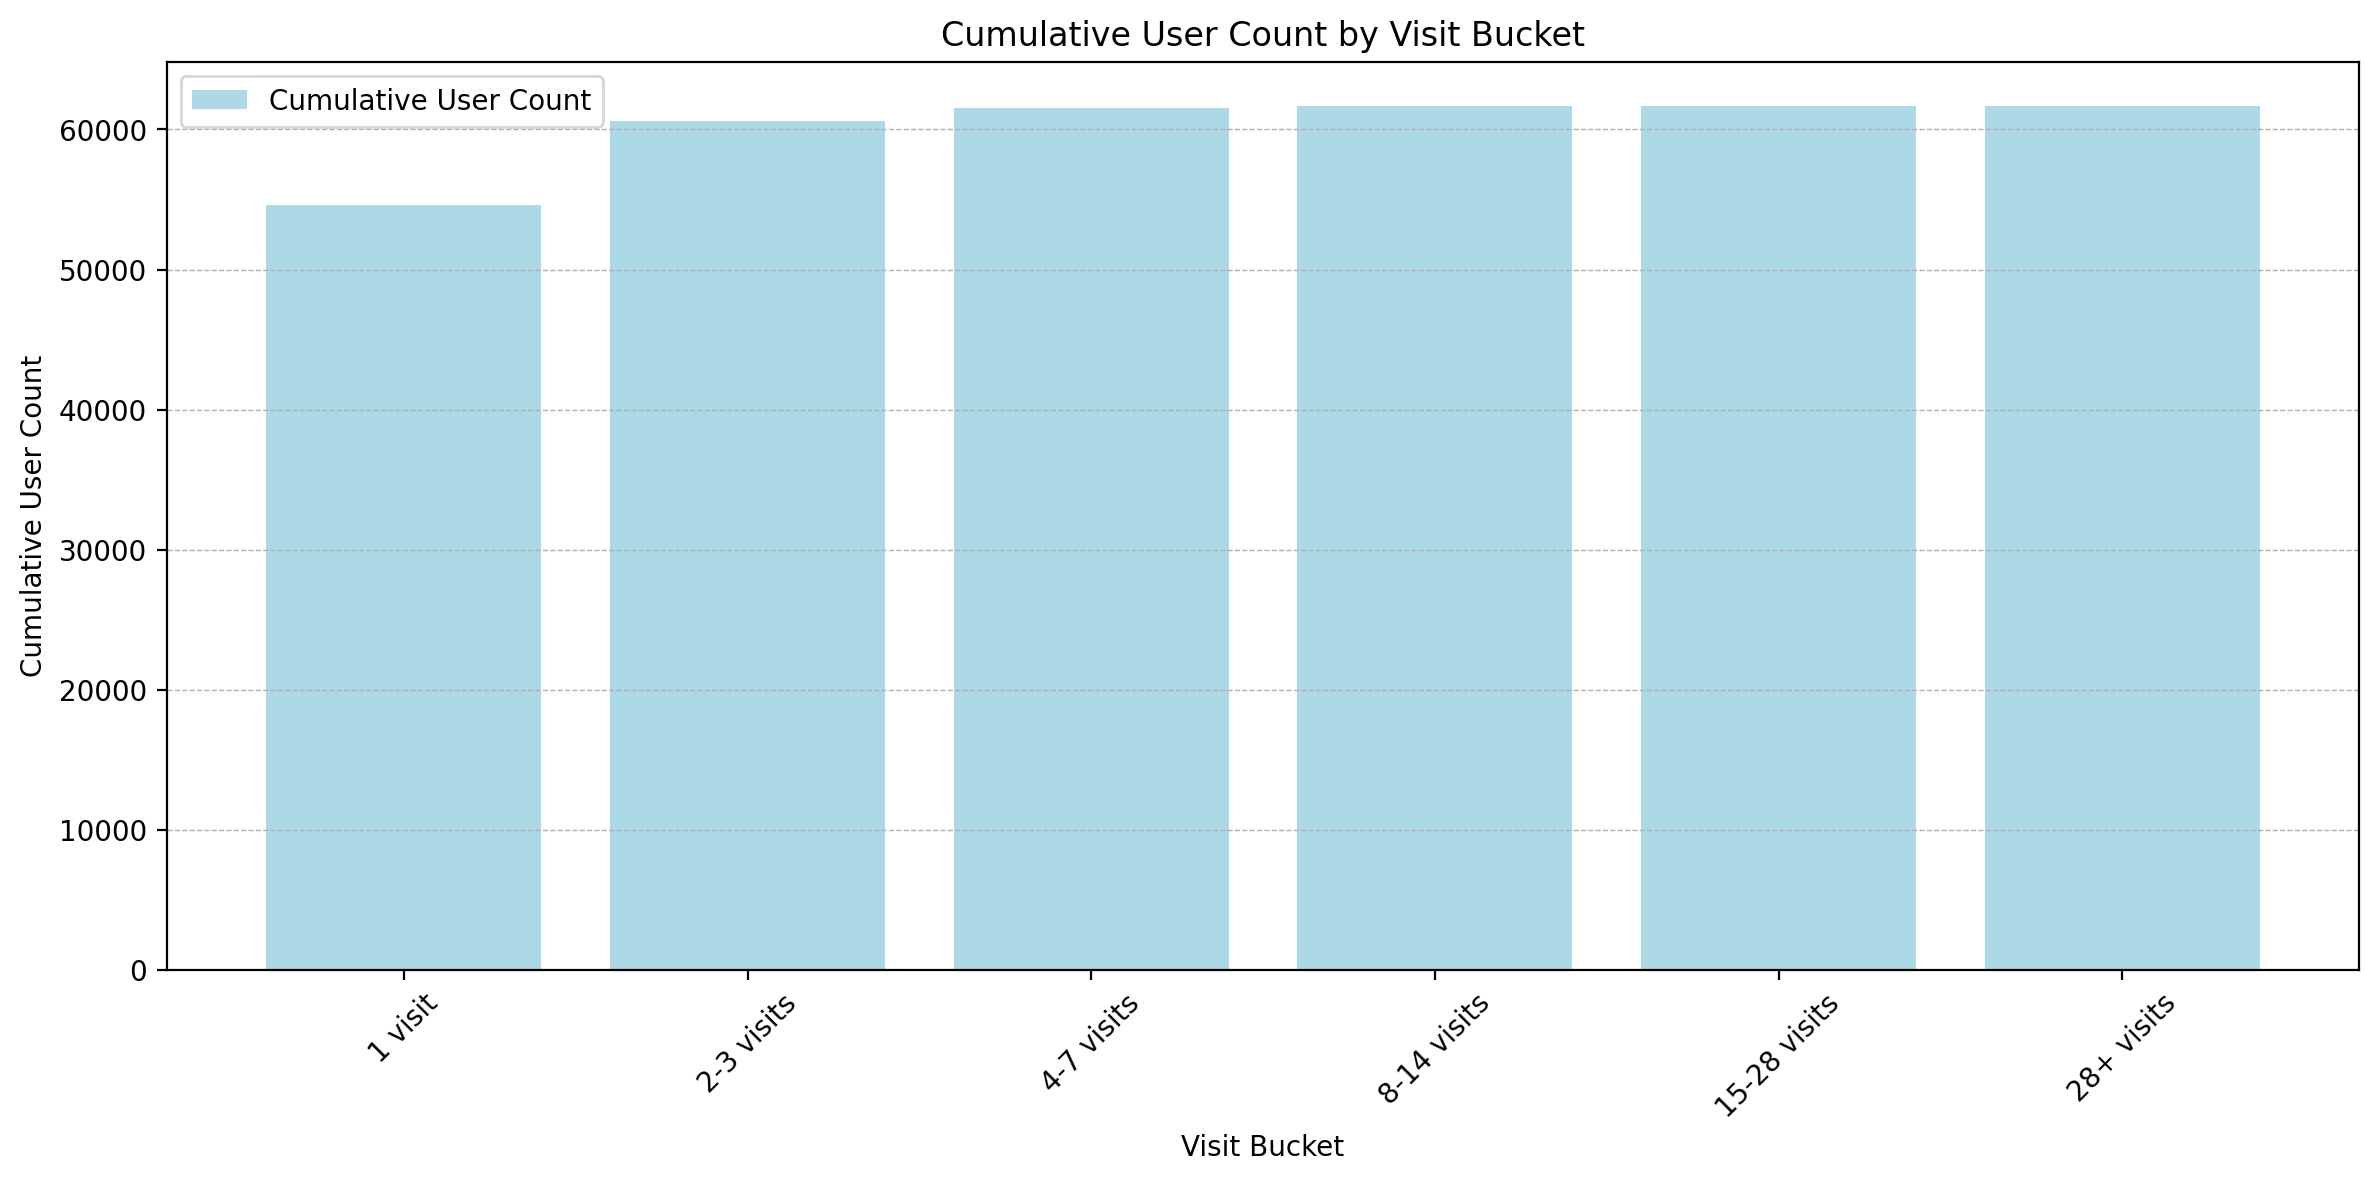

In [16]:
# Sorting data
order = ['1 visit', '2-3 visits', '4-7 visits', '8-14 visits', '15-28 visits', '28+ visits']
mau_result = mau_result.set_index('visit_bucket').loc[order].reset_index()

# Calculating cumulative sum
mau_result['cumulative_count'] = mau_result['user_count'].cumsum()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(mau_result['visit_bucket'], mau_result['cumulative_count'], color='lightblue', label='Cumulative User Count')
plt.xlabel('Visit Bucket')
plt.ylabel('Cumulative User Count')
plt.title('Cumulative User Count by Visit Bucket')
plt.xticks(rotation=45)
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.legend()
plt.show()

[일자별 집계]

In [17]:
# high level stats 

# Initialize a BigQuery client
client = bigquery.Client()

# Define your query
mau_query = """
WITH UserVisits AS (
    -- Count visits per user for each day
    SELECT
        PARSE_DATE('%Y%m%d', date) AS day,
        fullVisitorId,
        COUNT(*) AS visit_count
    FROM 
        `bigquery-public-data.google_analytics_sample.ga_sessions_*`
    WHERE
        _TABLE_SUFFIX BETWEEN '20160801' AND '20170731'  -- Adjust this range as needed
    GROUP BY 
        day, fullVisitorId
),

VisitBuckets AS (
    -- Categorize users based on visit count for each day
    SELECT
        day,
        CASE
            WHEN visit_count = 1 THEN "1 visit"
            WHEN visit_count BETWEEN 2 AND 3 THEN "2-3 visits"
            WHEN visit_count BETWEEN 4 AND 7 THEN "4-7 visits"
            WHEN visit_count BETWEEN 8 AND 14 THEN "8-14 visits"
            WHEN visit_count BETWEEN 15 AND 28 THEN "15-28 visits"
            ELSE "28+ visits"
        END AS visit_bucket,
        COUNT(DISTINCT fullVisitorId) AS user_count
    FROM 
        UserVisits
    GROUP BY 
        day, visit_bucket
)

SELECT 
    day,
    visit_bucket,
    user_count
FROM 
    VisitBuckets
ORDER BY 
    day,
    CASE 
        WHEN visit_bucket = "1 visit" THEN 1
        WHEN visit_bucket = "2-3 visits" THEN 2
        WHEN visit_bucket = "4-7 visits" THEN 3
        WHEN visit_bucket = "8-14 visits" THEN 4
        WHEN visit_bucket = "15-28 visits" THEN 5
        ELSE 6
    END;

"""

mau_result = client.query(mau_query).result().to_dataframe()

print(mau_result)

Using Kaggle's public dataset BigQuery integration.
             day visit_bucket  user_count
0     2016-08-01      1 visit        1454
1     2016-08-01   2-3 visits         112
2     2016-08-01   4-7 visits           2
3     2016-08-01  8-14 visits           1
4     2016-08-02      1 visit        1816
...          ...          ...         ...
1127  2017-07-30   4-7 visits           6
1128  2017-07-31      1 visit        2170
1129  2017-07-31   2-3 visits         185
1130  2017-07-31   4-7 visits          12
1131  2017-07-31  8-14 visits           1

[1132 rows x 3 columns]


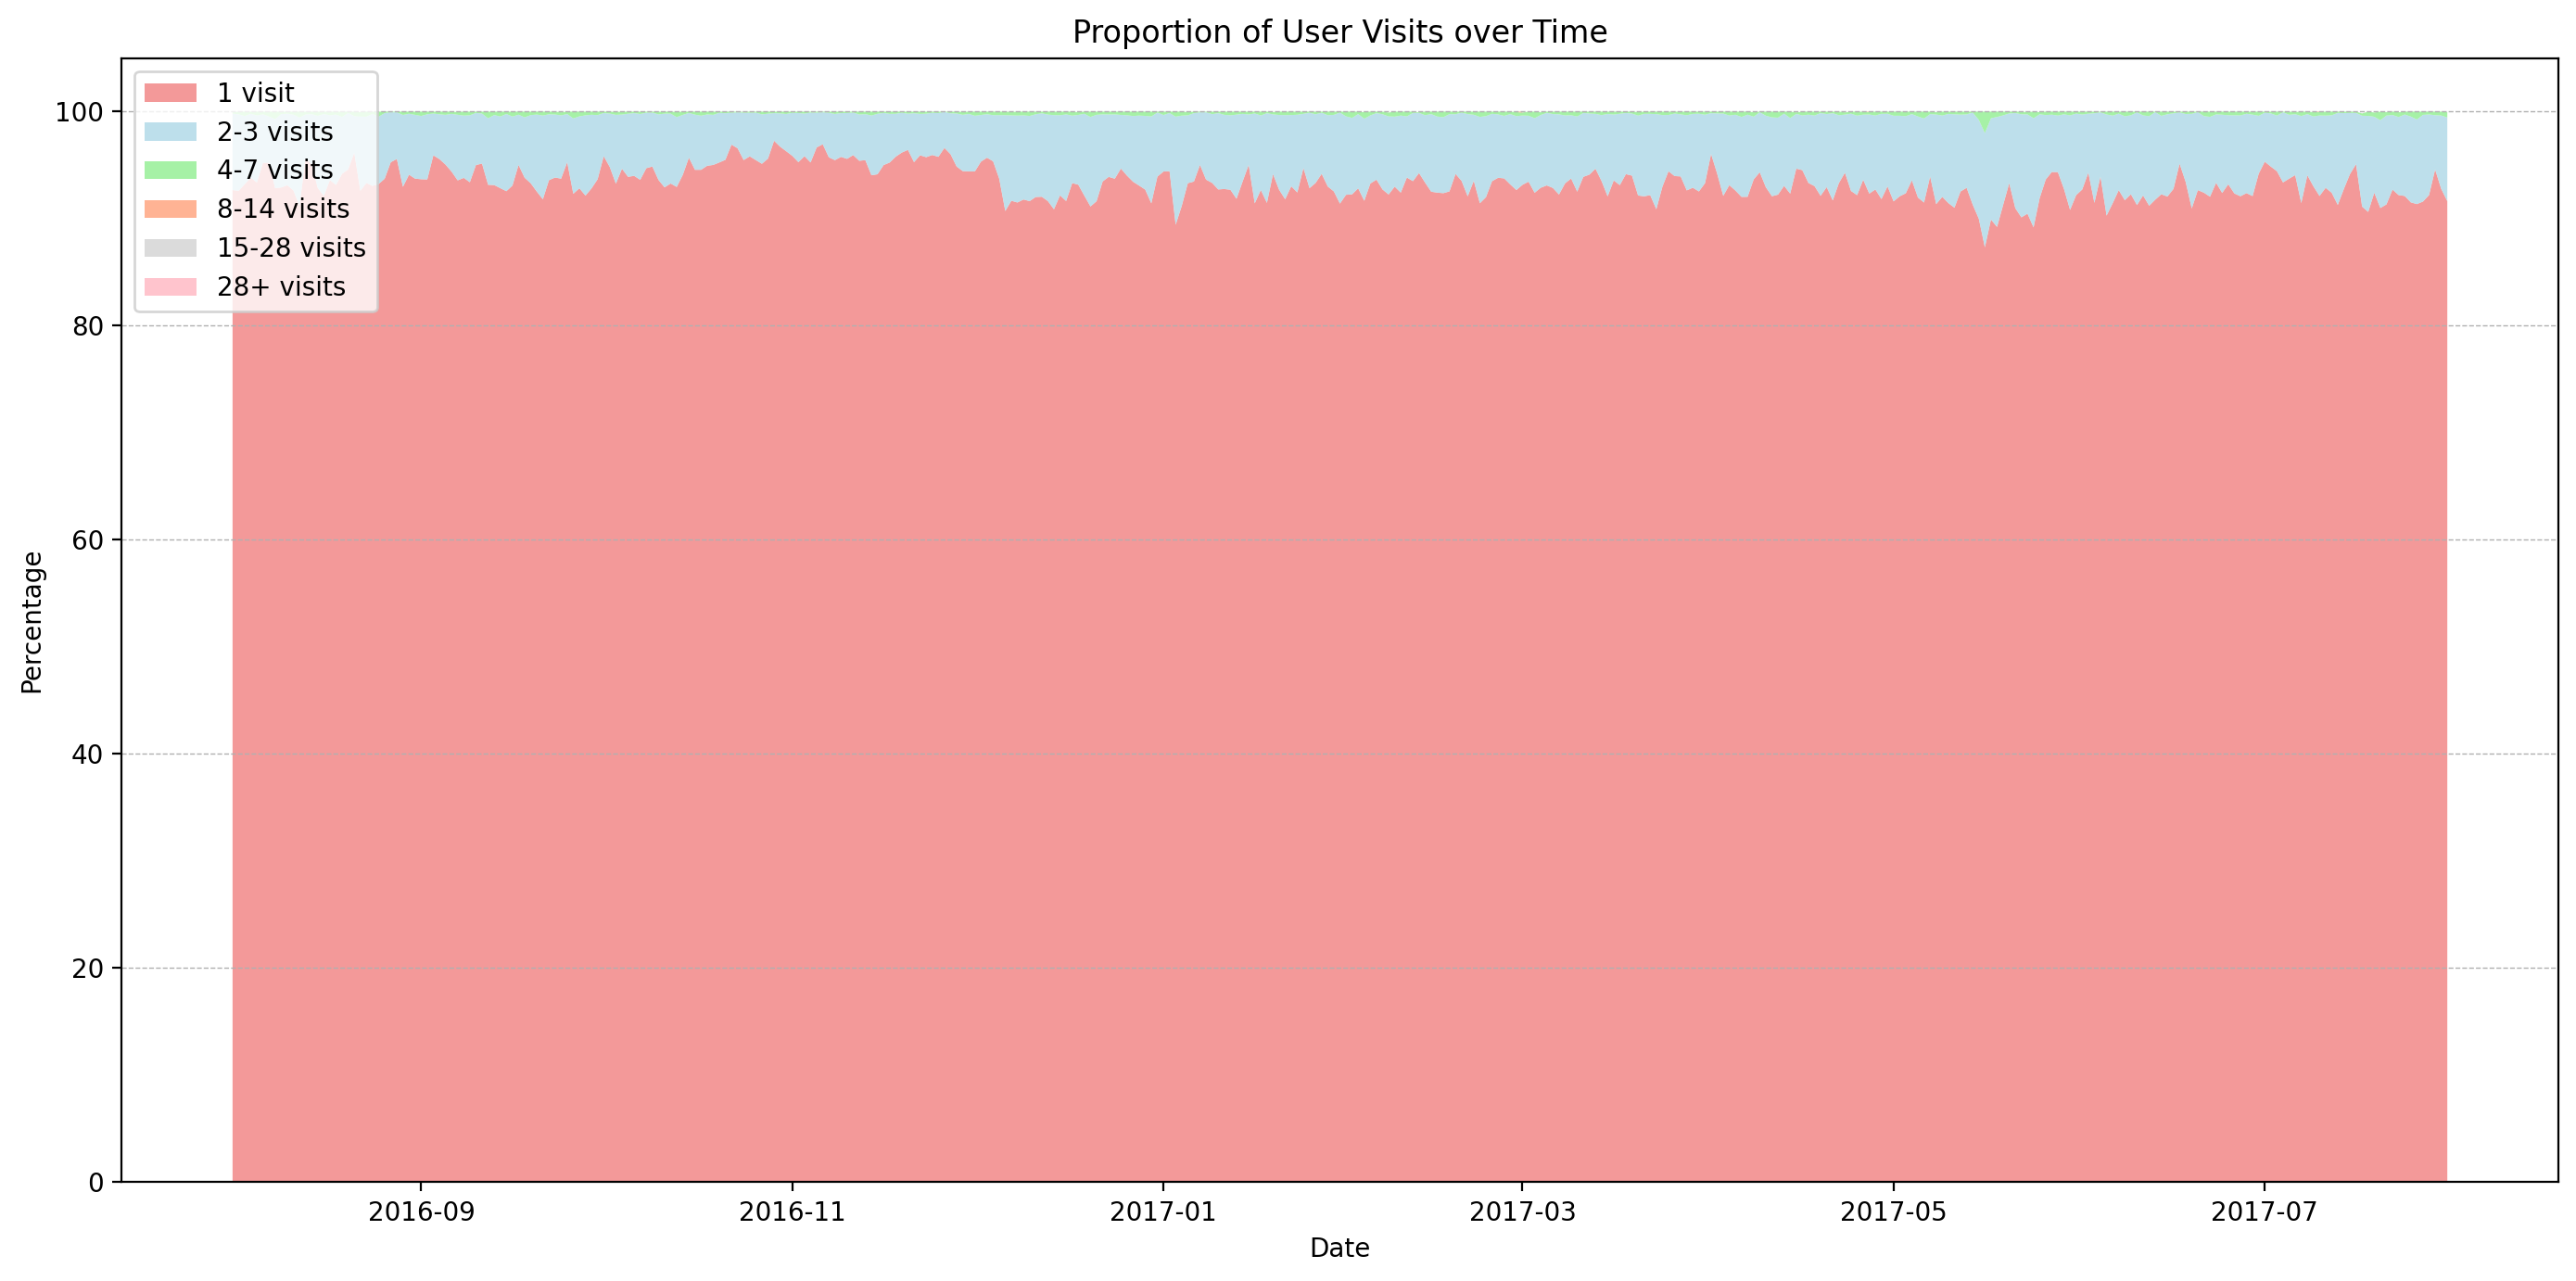

In [18]:
# Pivot the data for easier plotting
extended_mau_result_pivot = mau_result.pivot(index='day', columns='visit_bucket', values='user_count')
# Calculate the total user count for each day
extended_mau_result_pivot['total'] = extended_mau_result_pivot.sum(axis=1)

# Calculate proportions
for column in extended_mau_result_pivot.columns:
    if column != 'total':
        extended_mau_result_pivot[column] = extended_mau_result_pivot[column] / extended_mau_result_pivot['total'] * 100

# Plotting
colors = ['lightcoral', 'lightblue', 'lightgreen', 'lightsalmon', 'lightgray', 'lightpink']
plt.figure(figsize=(14, 7))
plt.stackplot(extended_mau_result_pivot.index, extended_mau_result_pivot['1 visit'], 
              extended_mau_result_pivot['2-3 visits'], extended_mau_result_pivot['4-7 visits'], 
              extended_mau_result_pivot['8-14 visits'], extended_mau_result_pivot['15-28 visits'],
              extended_mau_result_pivot['28+ visits'], labels=['1 visit', '2-3 visits', '4-7 visits', '8-14 visits', '15-28 visits', '28+ visits'], colors=colors, alpha=0.8)

plt.xlabel('Date')
plt.ylabel('Percentage')
plt.title('Proportion of User Visits over Time')
plt.legend(loc='upper left')
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

[가로로 정렬]

In [19]:
# high level stats 

# Initialize a BigQuery client
client = bigquery.Client()

# Define your query
mau_query = """
WITH UserVisits AS (
    -- Count visits per user for each day
    SELECT
        PARSE_DATE('%Y%m%d', date) AS day,
        fullVisitorId,
        COUNT(*) AS visit_count
    FROM 
        `bigquery-public-data.google_analytics_sample.ga_sessions_*`
    WHERE
        _TABLE_SUFFIX BETWEEN '20160801' AND '20170731'  -- Adjust this range as needed
    GROUP BY 
        day, fullVisitorId
)

SELECT 
    day,
    COUNT(DISTINCT CASE WHEN visit_count = 1 THEN fullVisitorId ELSE NULL END) AS `1_visit`,
    COUNT(DISTINCT CASE WHEN visit_count BETWEEN 2 AND 3 THEN fullVisitorId ELSE NULL END) AS `2_3_visits`,
    COUNT(DISTINCT CASE WHEN visit_count BETWEEN 4 AND 7 THEN fullVisitorId ELSE NULL END) AS `4_7_visits`,
    COUNT(DISTINCT CASE WHEN visit_count BETWEEN 8 AND 14 THEN fullVisitorId ELSE NULL END) AS `8_14_visits`,
    COUNT(DISTINCT CASE WHEN visit_count BETWEEN 15 AND 28 THEN fullVisitorId ELSE NULL END) AS `15_28_visits`,
    COUNT(DISTINCT CASE WHEN visit_count > 28 THEN fullVisitorId ELSE NULL END) AS `28plus_visits`
FROM 
    UserVisits
GROUP BY 
    day
ORDER BY 
    day;
"""

mau_result = client.query(mau_query).result().to_dataframe()

print(mau_result)

Using Kaggle's public dataset BigQuery integration.
            day  1_visit  2_3_visits  4_7_visits  8_14_visits  15_28_visits  \
0    2016-08-01     1454         112           2            1             0   
1    2016-08-02     1816         140           5            0             0   
2    2016-08-03     2477         169          11            0             0   
3    2016-08-04     2765         176           6            0             0   
4    2016-08-05     2327         156           9            0             0   
..          ...      ...         ...         ...          ...           ...   
360  2017-07-27     2104         186           7            0             0   
361  2017-07-28     2059         168           6            0             0   
362  2017-07-29     1417          76           5            0             0   
363  2017-07-30     1530         113           6            0             0   
364  2017-07-31     2170         185          12            1             0   


## 시간에 대한 집계

In [20]:
# high level stats 

# Initialize a BigQuery client
client = bigquery.Client()

# Define your query
mau_query = """
WITH FormattedData AS (
    SELECT 
        fullVisitorId,
        TIMESTAMP(
            CONCAT(
                SUBSTR(CAST(date AS STRING), 1, 4), '-', 
                SUBSTR(CAST(date AS STRING), 5, 2), '-', 
                SUBSTR(CAST(date AS STRING), 7, 2), ' ',
                LPAD(CAST(hit.hour AS STRING), 2, '0'), ':',
                LPAD(CAST(hit.minute AS STRING), 2, '0'), ':',
                '00'
        )
        ) AS formatted_datetime
    FROM 
        `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
        UNNEST(hits) AS hit  -- Unwrapping the hits array
    WHERE
        fullVisitorId IS NOT NULL
),

UserVisits AS (
    SELECT 
        fullVisitorId,
        MIN(formatted_datetime) AS first_visit,
        MAX(formatted_datetime) AS last_visit,
        COUNT(DISTINCT formatted_datetime) AS visit_count
    FROM
        FormattedData
    GROUP BY
        fullVisitorId
)

SELECT 
    fullVisitorId,
    first_visit,
    last_visit
FROM 
    UserVisits
WHERE
    visit_count > 1;
"""

mau_result = client.query(mau_query).result().to_dataframe()

print(mau_result)

Using Kaggle's public dataset BigQuery integration.
              fullVisitorId               first_visit  \
0       5062267969965796065 2017-02-09 23:40:00+00:00   
1       5649290986879182199 2016-11-18 03:03:00+00:00   
2       5481501961012178204 2017-03-14 07:43:00+00:00   
3       9425829881944098939 2017-02-07 06:00:00+00:00   
4       7906953848703527139 2017-03-07 07:06:00+00:00   
...                     ...                       ...   
308030  0983679191237821177 2017-03-23 09:05:00+00:00   
308031  5030123749954359448 2017-02-05 21:55:00+00:00   
308032  4359833289076116590 2017-07-27 22:29:00+00:00   
308033  0402571116105685463 2017-05-05 10:33:00+00:00   
308034  0901552564772076112 2016-12-08 14:45:00+00:00   

                      last_visit  
0      2017-03-14 18:39:00+00:00  
1      2017-03-26 09:20:00+00:00  
2      2017-05-18 06:33:00+00:00  
3      2017-03-15 03:52:00+00:00  
4      2017-03-14 12:17:00+00:00  
...                          ...  
308030 2017-07-05 

In [21]:
# high level stats 

# Initialize a BigQuery client
client = bigquery.Client()

mau_query = """
WITH FormattedData AS (
    SELECT 
        fullVisitorId,
        TIMESTAMP(
            CONCAT(
                SUBSTR(CAST(date AS STRING), 1, 4), '-', 
                SUBSTR(CAST(date AS STRING), 5, 2), '-', 
                SUBSTR(CAST(date AS STRING), 7, 2), ' ',
                LPAD(CAST(hit.hour AS STRING), 2, '0'), ':',
                LPAD(CAST(hit.minute AS STRING), 2, '0'), ':',
                '00'
            )
        ) AS formatted_datetime
    FROM 
        `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
        UNNEST(hits) AS hit  -- Unwrapping the hits array
    WHERE
        fullVisitorId IS NOT NULL
),

UserVisits AS (
    SELECT 
        fullVisitorId,
        MIN(formatted_datetime) AS first_visit,
        MAX(formatted_datetime) AS last_visit,
        COUNT(DISTINCT formatted_datetime) AS visit_count,
        TIMESTAMP_DIFF(MAX(formatted_datetime), MIN(formatted_datetime), SECOND) AS time_difference_seconds
    FROM
        FormattedData
    GROUP BY
        fullVisitorId
)

SELECT 
    fullVisitorId,
    first_visit,
    last_visit,
    CONCAT(
        CAST(FLOOR(time_difference_seconds / (3600 * 24)) AS STRING), ' day ',
        CAST(FLOOR(MOD(time_difference_seconds, (3600 * 24)) / 3600) AS STRING), ' hour ',
        CAST(FLOOR(MOD(time_difference_seconds, 3600) / 60) AS STRING), ' minute'
    ) AS time_difference
FROM 
    UserVisits
WHERE
    visit_count > 1;
"""

mau_result = client.query(mau_query).result().to_dataframe()

print(mau_result)

Using Kaggle's public dataset BigQuery integration.
              fullVisitorId               first_visit  \
0       1020142937618535503 2017-01-17 11:03:00+00:00   
1       9236810072595339632 2016-12-28 07:53:00+00:00   
2       4052316749457458771 2016-12-20 15:26:00+00:00   
3       3319449010724126532 2016-11-30 08:49:00+00:00   
4       5818907015155531907 2017-01-23 14:08:00+00:00   
...                     ...                       ...   
308030  7438334566586985368 2017-07-21 19:56:00+00:00   
308031  9516673624602389454 2017-02-17 16:28:00+00:00   
308032  7000890507218473765 2017-03-07 00:11:00+00:00   
308033  1611453642221139587 2016-09-02 21:31:00+00:00   
308034  2416697838199326267 2017-05-10 11:26:00+00:00   

                      last_visit           time_difference  
0      2017-02-27 15:54:00+00:00   41 day 4 hour 51 minute  
1      2017-01-23 12:33:00+00:00   26 day 4 hour 40 minute  
2      2017-01-23 17:52:00+00:00   34 day 2 hour 26 minute  
3      2017-01-24 1

시간 차 계산

In [22]:
# high level stats 

# Initialize a BigQuery client
client = bigquery.Client()

mau_query = """
WITH FormattedData AS (
    SELECT 
        fullVisitorId,
        TIMESTAMP(
            CONCAT(
                SUBSTR(CAST(date AS STRING), 1, 4), '-', 
                SUBSTR(CAST(date AS STRING), 5, 2), '-', 
                SUBSTR(CAST(date AS STRING), 7, 2), ' ',
                LPAD(CAST(hit.hour AS STRING), 2, '0'), ':',
                LPAD(CAST(hit.minute AS STRING), 2, '0'), ':',
                '00'
            )
        ) AS formatted_datetime
    FROM 
        `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
        UNNEST(hits) AS hit  -- Unwrapping the hits array
    WHERE
        fullVisitorId IS NOT NULL
),

UserVisits AS (
    SELECT 
        fullVisitorId,
        MIN(formatted_datetime) AS first_visit,
        MAX(formatted_datetime) AS last_visit,
        COUNT(DISTINCT formatted_datetime) AS visit_count,
        TIMESTAMP_DIFF(MAX(formatted_datetime), MIN(formatted_datetime), SECOND) AS time_difference_seconds
    FROM
        FormattedData
    GROUP BY
        fullVisitorId
)

SELECT 
    fullVisitorId,
    first_visit,
    last_visit,
    CONCAT(
        CAST(FLOOR(time_difference_seconds / (3600 * 24)) AS STRING), ' day ',
        CAST(FLOOR(MOD(time_difference_seconds, (3600 * 24)) / 3600) AS STRING), ' hour ',
        CAST(FLOOR(MOD(time_difference_seconds, 3600) / 60) AS STRING), ' minute'
    ) AS time_difference
FROM 
    UserVisits
WHERE
    visit_count > 1;
"""

mau_result = client.query(mau_query).result().to_dataframe()

print(mau_result)

Using Kaggle's public dataset BigQuery integration.
              fullVisitorId               first_visit  \
0       9828660083367683185 2016-08-27 07:30:00+00:00   
1       0949718915643445721 2016-08-06 14:25:00+00:00   
2       6956589918284990374 2016-08-27 13:11:00+00:00   
3        036422844910534061 2016-08-26 12:58:00+00:00   
4        675277436567526977 2016-08-27 15:07:00+00:00   
...                     ...                       ...   
308030  8829445822273206812 2017-05-25 06:16:00+00:00   
308031  1717278753340548523 2016-08-05 13:02:00+00:00   
308032  3407704737972804898 2017-05-08 04:43:00+00:00   
308033  7073046448526691165 2017-05-23 17:39:00+00:00   
308034  0873101142558634439 2017-03-13 00:26:00+00:00   

                      last_visit           time_difference  
0      2016-08-27 09:20:00+00:00    0 day 1 hour 50 minute  
1      2016-10-18 10:24:00+00:00  72 day 19 hour 59 minute  
2      2016-08-27 15:33:00+00:00    0 day 2 hour 22 minute  
3      2016-08-27 1

## 신규유저와 기존사용자 구분

In [23]:
# high level stats 

# Initialize a BigQuery client
client = bigquery.Client()

mau_query = """
WITH MonthlyVisits AS (
    -- Extract year and month, and count unique visitors
    SELECT 
        EXTRACT(YEAR FROM TIMESTAMP_SECONDS(visitStartTime)) AS year,
        EXTRACT(MONTH FROM TIMESTAMP_SECONDS(visitStartTime)) AS month,
        fullVisitorId,
        IFNULL(totals.newVisits, 0) AS isNewVisit
    FROM 
        `bigquery-public-data.google_analytics_sample.ga_sessions_*`
    WHERE
        fullVisitorId IS NOT NULL
    GROUP BY 
        year, month, fullVisitorId, isNewVisit
),

MonthlyAggregated AS (
    -- Aggregate by year, month, and visit type (new vs returning)
    SELECT 
        year,
        month,
        isNewVisit,
        COUNT(DISTINCT fullVisitorId) AS unique_visitors_count
    FROM 
        MonthlyVisits
    GROUP BY 
        year, month, isNewVisit
)

-- Final output, pivot the results
SELECT 
    year,
    month,
    MAX(IF(isNewVisit = 1, unique_visitors_count, NULL)) AS New_MAU,
    MAX(IF(isNewVisit = 0, unique_visitors_count, NULL)) AS Returning_MAU
FROM 
    MonthlyAggregated
GROUP BY 
    year, month
ORDER BY 
    year, month;
"""

mau_result = client.query(mau_query).result().to_dataframe()

print(mau_result)

Using Kaggle's public dataset BigQuery integration.
    year  month  New_MAU  Returning_MAU
0   2016      8    57724           9189
1   2016      9    55650           8940
2   2016     10    80638           9910
3   2016     11    94514          11703
4   2016     12    58448          12375
5   2017      1    48287           9700
6   2017      2    47661           8625
7   2017      3    54151           9542
8   2017      4    51953           9103
9   2017      5    48121          10455
10  2017      6    48020           9444
11  2017      7    54669          10079
12  2017      8     2363            686


전체합계 포

In [24]:
# high level stats 

# Initialize a BigQuery client
client = bigquery.Client()

mau_query = """
WITH MonthlyVisits AS (
    -- Extract year and month, and count unique visitors
    SELECT 
        EXTRACT(YEAR FROM TIMESTAMP_SECONDS(visitStartTime)) AS year,
        EXTRACT(MONTH FROM TIMESTAMP_SECONDS(visitStartTime)) AS month,
        fullVisitorId,
        visitId,
        IFNULL(totals.newVisits, 0) AS isNewVisit
    FROM 
        `bigquery-public-data.google_analytics_sample.ga_sessions_*`
    WHERE
        fullVisitorId IS NOT NULL
    GROUP BY 
        year, month, fullVisitorId, visitId, isNewVisit
),

MonthlyAggregated AS (
    -- Aggregate by year, month, and visit type (new vs returning)
    SELECT 
        year,
        month,
        isNewVisit,
        COUNT(DISTINCT fullVisitorId) AS unique_visitors_count,
        COUNT(DISTINCT visitId) AS unique_visitId_count
    FROM 
        MonthlyVisits
    GROUP BY 
        year, month, isNewVisit
)

-- Final output, pivot the results
SELECT 
    year,
    month,
    MAX(IF(isNewVisit = 1, unique_visitors_count, NULL)) AS New_MAU,
    MAX(IF(isNewVisit = 0, unique_visitors_count, NULL)) AS Returning_MAU,
    SUM(unique_visitors_count) AS Total_MAU,
    SUM(unique_visitId_count) AS VisitId_MAU
FROM 
    MonthlyAggregated
GROUP BY 
    year, month
ORDER BY 
    year, month;
"""

mau_result = client.query(mau_query).result().to_dataframe()

print(mau_result)

Using Kaggle's public dataset BigQuery integration.
    year  month  New_MAU  Returning_MAU  Total_MAU  VisitId_MAU
0   2016      8    57724           9189      66913        73231
1   2016      9    55650           8940      64590        70252
2   2016     10    80638           9910      90548        95542
3   2016     11    94514          11703     106217       111631
4   2016     12    58448          12375      70823        79059
5   2017      1    48287           9700      57987        63702
6   2017      2    47661           8625      56286        61387
7   2017      3    54151           9542      63693        69071
8   2017      4    51953           9103      61056        66285
9   2017      5    48121          10455      58576        64558
10  2017      6    48020           9444      57464        62687
11  2017      7    54669          10079      64748        70836
12  2017      8     2363            686       3049         3187


## 트래픽의 유입

In [25]:
# high level stats 

# Initialize a BigQuery client
client = bigquery.Client()

mau_query = """
select trafficSource.medium, trafficSource.source, count(distinct fullVisitorId)
FROM 
    `bigquery-public-data.google_analytics_sample.ga_sessions_*`
group by trafficSource.medium, trafficSource.source
order by 1,2
"""

mau_result = client.query(mau_query).result().to_dataframe()

print(mau_result)

Using Kaggle's public dataset BigQuery integration.
        medium            source     f0_
0       (none)          (direct)  275409
1    (not set)         (not set)      55
2    (not set)          Partners       6
3    (not set)            google      28
4    (not set)             yahoo       1
..         ...               ...     ...
277   referral  web.telegram.org       4
278   referral  web.whatsapp.com       1
279   referral     wheretoget.it      12
280   referral         yahoo.com       1
281   referral       youtube.com  201088

[282 rows x 3 columns]


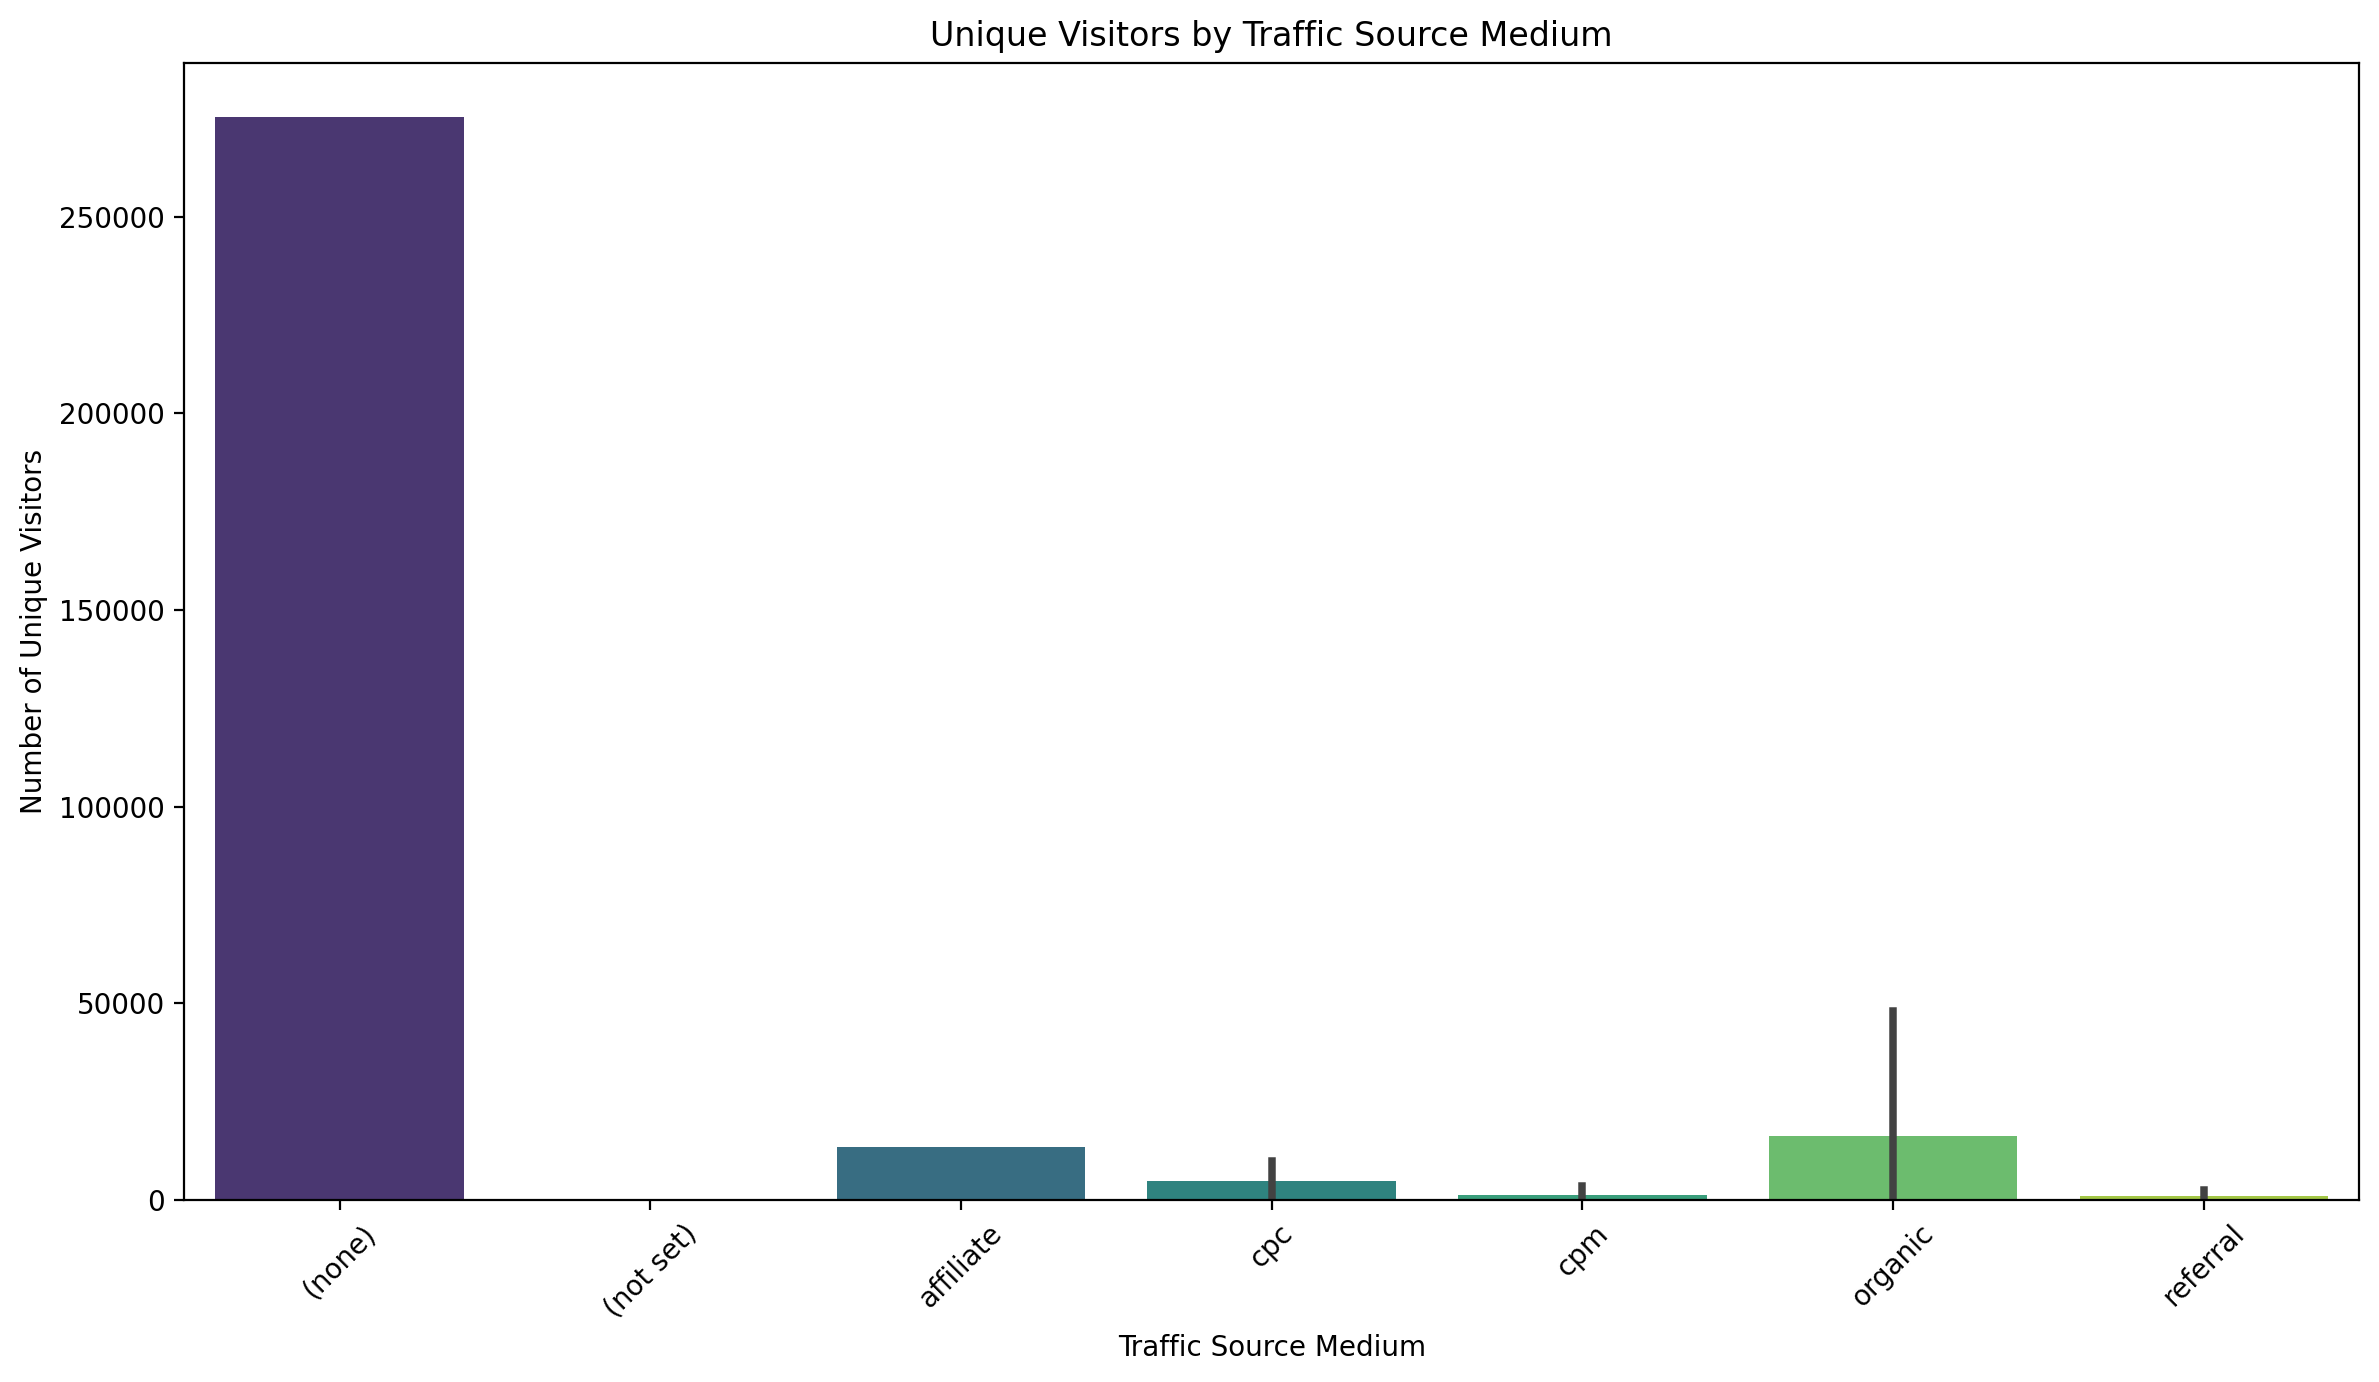

In [26]:
# Let's try plotting the graph again
plt.figure(figsize=(12, 7))
sns.barplot(x='medium', y='f0_', data=mau_result, palette="viridis")
plt.title('Unique Visitors by Traffic Source Medium')
plt.xlabel('Traffic Source Medium')
plt.ylabel('Number of Unique Visitors')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

채널 별 접속경로 구하기

In [27]:
# high level stats 

# Initialize a BigQuery client
client = bigquery.Client()

mau_query = """
select channelGrouping, trafficSource.medium, trafficSource.source, count(distinct fullVisitorId)
FROM 
    `bigquery-public-data.google_analytics_sample.ga_sessions_*`
group by channelGrouping, trafficSource.medium, trafficSource.source
order by 1,2,3
"""

mau_result = client.query(mau_query).result().to_dataframe()

print(mau_result)

Using Kaggle's public dataset BigQuery integration.
    channelGrouping     medium            source     f0_
0           (Other)     (none)          (direct)       2
1           (Other)  (not set)         (not set)      55
2           (Other)  (not set)          Partners       6
3           (Other)  (not set)            google      28
4           (Other)  (not set)             yahoo       1
..              ...        ...               ...     ...
283          Social   referral       twitter.com       4
284          Social   referral     us.reddit.com       1
285          Social   referral            vk.com      26
286          Social   referral  web.facebook.com       5
287          Social   referral       youtube.com  201088

[288 rows x 4 columns]


채널 별 MAU 구하기

In [28]:
# high level stats 

# Initialize a BigQuery client
client = bigquery.Client()

mau_query = """
WITH NewMAU AS (
    -- Calculate New MAU for each channelGrouping
    SELECT 
        channelGrouping,
        COUNT(DISTINCT fullVisitorId) AS new_mau
    FROM 
        `bigquery-public-data.google_analytics_sample.ga_sessions_*`
    WHERE
        totals.newVisits = 1
    GROUP BY 
        channelGrouping
),

TotalMAU AS (
    -- Calculate Total MAU for each channelGrouping
    SELECT 
        channelGrouping,
        COUNT(DISTINCT fullVisitorId) AS total_mau
    FROM 
        `bigquery-public-data.google_analytics_sample.ga_sessions_*`
    GROUP BY 
        channelGrouping
)

-- Calculate the percentages and merge the results
SELECT 
    n.channelGrouping,
    n.new_mau,
    t.total_mau,
    ROUND(100 * n.new_mau / SUM(n.new_mau) OVER(), 2) AS new_mau_percentage,
    ROUND(100 * t.total_mau / SUM(t.total_mau) OVER(), 2) AS total_mau_percentage
FROM 
    NewMAU n
JOIN 
    TotalMAU t
ON 
    n.channelGrouping = t.channelGrouping
ORDER BY 
    n.channelGrouping;
"""

mau_result = client.query(mau_query).result().to_dataframe()

print(mau_result)

Using Kaggle's public dataset BigQuery integration.
  channelGrouping  new_mau  total_mau  new_mau_percentage  \
0         (Other)       25         90                0.00   
1      Affiliates    12484      13400                1.78   
2          Direct   106615     109830               15.19   
3         Display     1876       4103                0.27   
4  Organic Search   302100     311607               43.04   
5     Paid Search    15726      18702                2.24   
6        Referral    53183      65661                7.58   
7          Social   209907     212374               29.90   

   total_mau_percentage  
0                  0.01  
1                  1.82  
2                 14.93  
3                  0.56  
4                 42.35  
5                  2.54  
6                  8.92  
7                 28.86  


채널별 매출액, 매출고객수 구하기

In [29]:
mau_query = """
WITH RevenueAndPurchases AS (
    -- Extract productRevenue and transactionId for each session and channelGrouping
    SELECT 
        channelGrouping,
        product.productRevenue AS revenue,
        fullVisitorId AS purchase_id
    FROM 
        `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
        UNNEST(hits) AS hit,  -- Unnest hits array
        UNNEST(hit.product) AS product  -- Unnest product array within hits
    WHERE
        fullVisitorId IS NOT NULL
        AND product.productRevenue IS NOT NULL
)

-- Aggregate revenue and count purchases by channelGrouping
SELECT 
    channelGrouping,
    SUM(revenue) AS total_revenue,
    COUNT(DISTINCT purchase_id) AS purchase_count
FROM 
    RevenueAndPurchases
GROUP BY 
    channelGrouping
ORDER BY 
    total_revenue DESC, channelGrouping;
"""

mau_result = client.query(mau_query).result().to_dataframe()

print(mau_result)

  channelGrouping  total_revenue  purchase_count
0        Referral   702386787437            4593
1          Direct   493222858783            1725
2  Organic Search   360778348312            3154
3         Display   129441319913             122
4     Paid Search    47260109775             444
5          Social     8307459974             100
6      Affiliates      638099996               9
7         (Other)       11990000               1


고객별, 구매건별 Revenue 산출

In [30]:
mau_query = """
WITH UnnestedData AS (
  SELECT
    visitorId,
    visitId,
    hits.type AS hitType,
    product.productSKU AS sku,
    product.productRevenue AS revenue
  FROM
    `bigquery-public-data.google_analytics_sample.ga_sessions_*`, 
    UNNEST(hits) AS hits,
    UNNEST(hits.product) AS product
)

SELECT
  visitorId,
  visitId,
  hitType,
  sku,
  revenue
FROM
  UnnestedData
WHERE
  revenue IS NOT NULL
ORDER BY
  revenue DESC;
"""

mau_result = client.query(mau_query).result().to_dataframe()

print(mau_result)

       visitorId     visitId hitType             sku     revenue
0            NaN  1491423580    PAGE  GGOEGHPJ080110  9496000000
1            NaN  1491423580    PAGE  GGOEGOCL077699  7496000000
2            NaN  1481592907    PAGE  GGOEGDHQ015399  7003500000
3            NaN  1491423580    PAGE  GGOEGOCB017499  6594700000
4            NaN  1497904048    PAGE  GGOEGEVB070499  6252750000
...          ...         ...     ...             ...         ...
36813        NaN  1497812014    PAGE  GGOEGGOA017399     1123333
36814        NaN  1497812014    PAGE  GGOEGOAC021799     1123333
36815        NaN  1471752267    PAGE  GGOEGOAC021799     1075714
36816        NaN  1488652808    PAGE  GGOEGGOA017399      990000
36817        NaN  1492694669    PAGE  GGOEGGOA017399      895263

[36818 rows x 5 columns]


## 웹사이트 퍼포먼스 분석

분석 데이터 점검

In [31]:
mau_query = """
SELECT 
    visitId,
    fullVisitorId AS sess_id,
    date as date,
    hit.hitNumber AS hit_seq,
    hit.type AS hit_type,
    hit.eventInfo.eventAction AS action_type,
    hit.page.pagePath AS page_path,
    IF(hit.isExit, "true", "false") AS is_exit,
    hit.time AS hit_time,
    hit.hour AS hit_hour,
    hit.minute AS hit_minute,
    hit.appInfo.appName AS app_name,
    hit.appInfo.screenName AS screen_name,
    hit.appInfo.landingscreenName AS landing_screen_name,
    hit.appInfo.exitscreenName AS exit_screen_name
    
FROM 
    `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
    UNNEST(hits) AS hit
where fullVisitorId = '0000010278554503158' 
limit 100;
"""

mau_result = client.query(mau_query).result().to_dataframe()

print(mau_result)

       visitId              sess_id      date  hit_seq hit_type  \
0   1477029466  0000010278554503158  20161020        1     PAGE   
1   1477029466  0000010278554503158  20161020        2     PAGE   
2   1477029466  0000010278554503158  20161020        3     PAGE   
3   1477029466  0000010278554503158  20161020        4     PAGE   
4   1477029466  0000010278554503158  20161020        5    EVENT   
5   1477029466  0000010278554503158  20161020        6     PAGE   
6   1477029466  0000010278554503158  20161020        7    EVENT   
7   1477029466  0000010278554503158  20161020        8    EVENT   
8   1477029466  0000010278554503158  20161020        9     PAGE   
9   1477029466  0000010278554503158  20161020       10     PAGE   
10  1477029466  0000010278554503158  20161020       11     PAGE   

        action_type                                          page_path  \
0              None                                              /home   
1              None                 /google+red

## 페이지뷰 별 집계

In [32]:
# 쿼리를 정의합니다.
query = """
SELECT 
    hit.page.pagePath AS page_path,
    COUNT(*) AS page_path_count
    
FROM 
    `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
    UNNEST(hits) AS hit
    
WHERE 
    hit.eventInfo.eventAction is not null
    
GROUP BY 
    hit.page.pagePath
    
ORDER BY 
    page_path_count DESC;
"""

# 쿼리를 실행합니다.
result = client.query(query).result().to_dataframe()

print(result)

                                             page_path  page_path_count
0                                                /home            51999
1               /google+redesign/shop+by+brand/youtube            36066
2      /google+redesign/apparel/men++s/men++s+t+shirts            32908
3                                /google+redesign/bags            28849
4                                        /asearch.html            23631
..                                                 ...              ...
728  /google+redesign/apparel/mens+tshirts/google+m...                1
729  /google+redesign/apparel/women+s+google+quillt...                1
730  /google+redesign/apparel/men+s+t+shirts/androi...                1
731  /google+redesign/apparel/men+s+t+shirts/google...                1
732  /google+redesign/apparel/kids/kids+toddler/you...                1

[733 rows x 2 columns]


## 얼마나 많이 방문했을까?

In [33]:
# 쿼리를 정의합니다.
query = """
SELECT 
    fullVisitorId AS sess_id,
    COUNT(*) AS visit_count
    
FROM 
    `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
    UNNEST(hits) AS hit
    
WHERE 
    hit.eventInfo.eventAction is not null
    
GROUP BY 
    fullVisitorId
    
ORDER BY 
    visit_count DESC;

"""

# 쿼리를 실행합니다.
result = client.query(query).result().to_dataframe()

print(result)

                    sess_id  visit_count
0       1957458976293878100          835
1       0824839726118485274          671
2       1856749147915772585          459
3       3560900121641699481          361
4       7483600664917507409          306
...                     ...          ...
125291  1047117662435251000            1
125292  8690898682828267039            1
125293   585829577270169322            1
125294  1752661843792498754            1
125295   063444907153318630            1

[125296 rows x 2 columns]


평균 방문율

In [34]:
# 쿼리를 정의합니다.
query = """
WITH visit_counts AS (
    SELECT 
        fullVisitorId AS sess_id,
        COUNT(*) AS visit_count
    
    FROM 
        `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
        UNNEST(hits) AS hit
    
    WHERE 
        hit.eventInfo.eventAction is not null
    
    GROUP BY 
        fullVisitorId
)

SELECT 
    AVG(visit_count) AS average_visits,
    MAX(visit_count) AS max_visits,
FROM 
    visit_counts;

"""

# 쿼리를 실행합니다.
result = client.query(query).result().to_dataframe()

print(result)

   average_visits  max_visits
0        5.137834         835


4분위수로 살펴보는 자료

In [35]:
# 쿼리를 정의합니다.
query = """
WITH visit_counts AS (
    SELECT 
        fullVisitorId AS sess_id,
        COUNT(*) AS visit_count
    
    FROM 
        `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
        UNNEST(hits) AS hit
    
    WHERE 
        hit.eventInfo.eventAction is not null
    
    GROUP BY 
        fullVisitorId
),
aggregated AS (
    SELECT 
        ARRAY_AGG(visit_count ORDER BY visit_count) AS sorted_counts
    FROM 
        visit_counts
)

SELECT 
    sorted_counts[OFFSET(CAST(0.25 * ARRAY_LENGTH(sorted_counts) AS INT64))] AS percentile_25,
    sorted_counts[OFFSET(CAST(0.50 * ARRAY_LENGTH(sorted_counts) AS INT64))] AS percentile_50,
    sorted_counts[OFFSET(CAST(0.75 * ARRAY_LENGTH(sorted_counts) AS INT64))] AS percentile_75,
    sorted_counts[ARRAY_LENGTH(sorted_counts) - 1] AS percentile_100
FROM 
    aggregated;

"""

# 쿼리를 실행합니다.
result = client.query(query).result().to_dataframe()

print(result)

   percentile_25  percentile_50  percentile_75  percentile_100
0              1              2              5             835


직전 30일간 Pageview 방문수

In [36]:
# 쿼리를 정의합니다.
query = """
WITH DateRange AS (
    -- 각 날짜와 그 날짜의 30일 전 날짜를 계산
    SELECT 
        date,
        FORMAT_DATE('%Y%m%d', DATE_SUB(PARSE_DATE('%Y%m%d', date), INTERVAL 30 DAY)) AS start_date
    FROM 
        `bigquery-public-data.google_analytics_sample.ga_sessions_*`
    GROUP BY 
        date
),
PageViewsLast30Days AS (
    -- 각 날짜의 30일 전의 페이지뷰를 계산
    SELECT 
        dr.date,
        COUNT(hit.page.pagePath) AS pageviews_last_30_days
    FROM 
        DateRange dr
        JOIN `bigquery-public-data.google_analytics_sample.ga_sessions_*` ga
        ON ga.date BETWEEN dr.start_date AND dr.date
        , UNNEST(hits) AS hit
    WHERE 
        hit.eventInfo.eventAction is not null
    GROUP BY 
        dr.date
)

SELECT 
    date,
    pageviews_last_30_days
FROM 
    PageViewsLast30Days
ORDER BY 
    date DESC;

"""

# 쿼리를 실행합니다.
result = client.query(query).result().to_dataframe()

print(result)

         date  pageviews_last_30_days
0    20170801                   52175
1    20170731                   51277
2    20170730                   50300
3    20170729                   50571
4    20170728                   50951
..        ...                     ...
361  20160805                   17376
362  20160804                   13871
363  20160803                   10533
364  20160802                    6665
365  20160801                    2988

[366 rows x 2 columns]


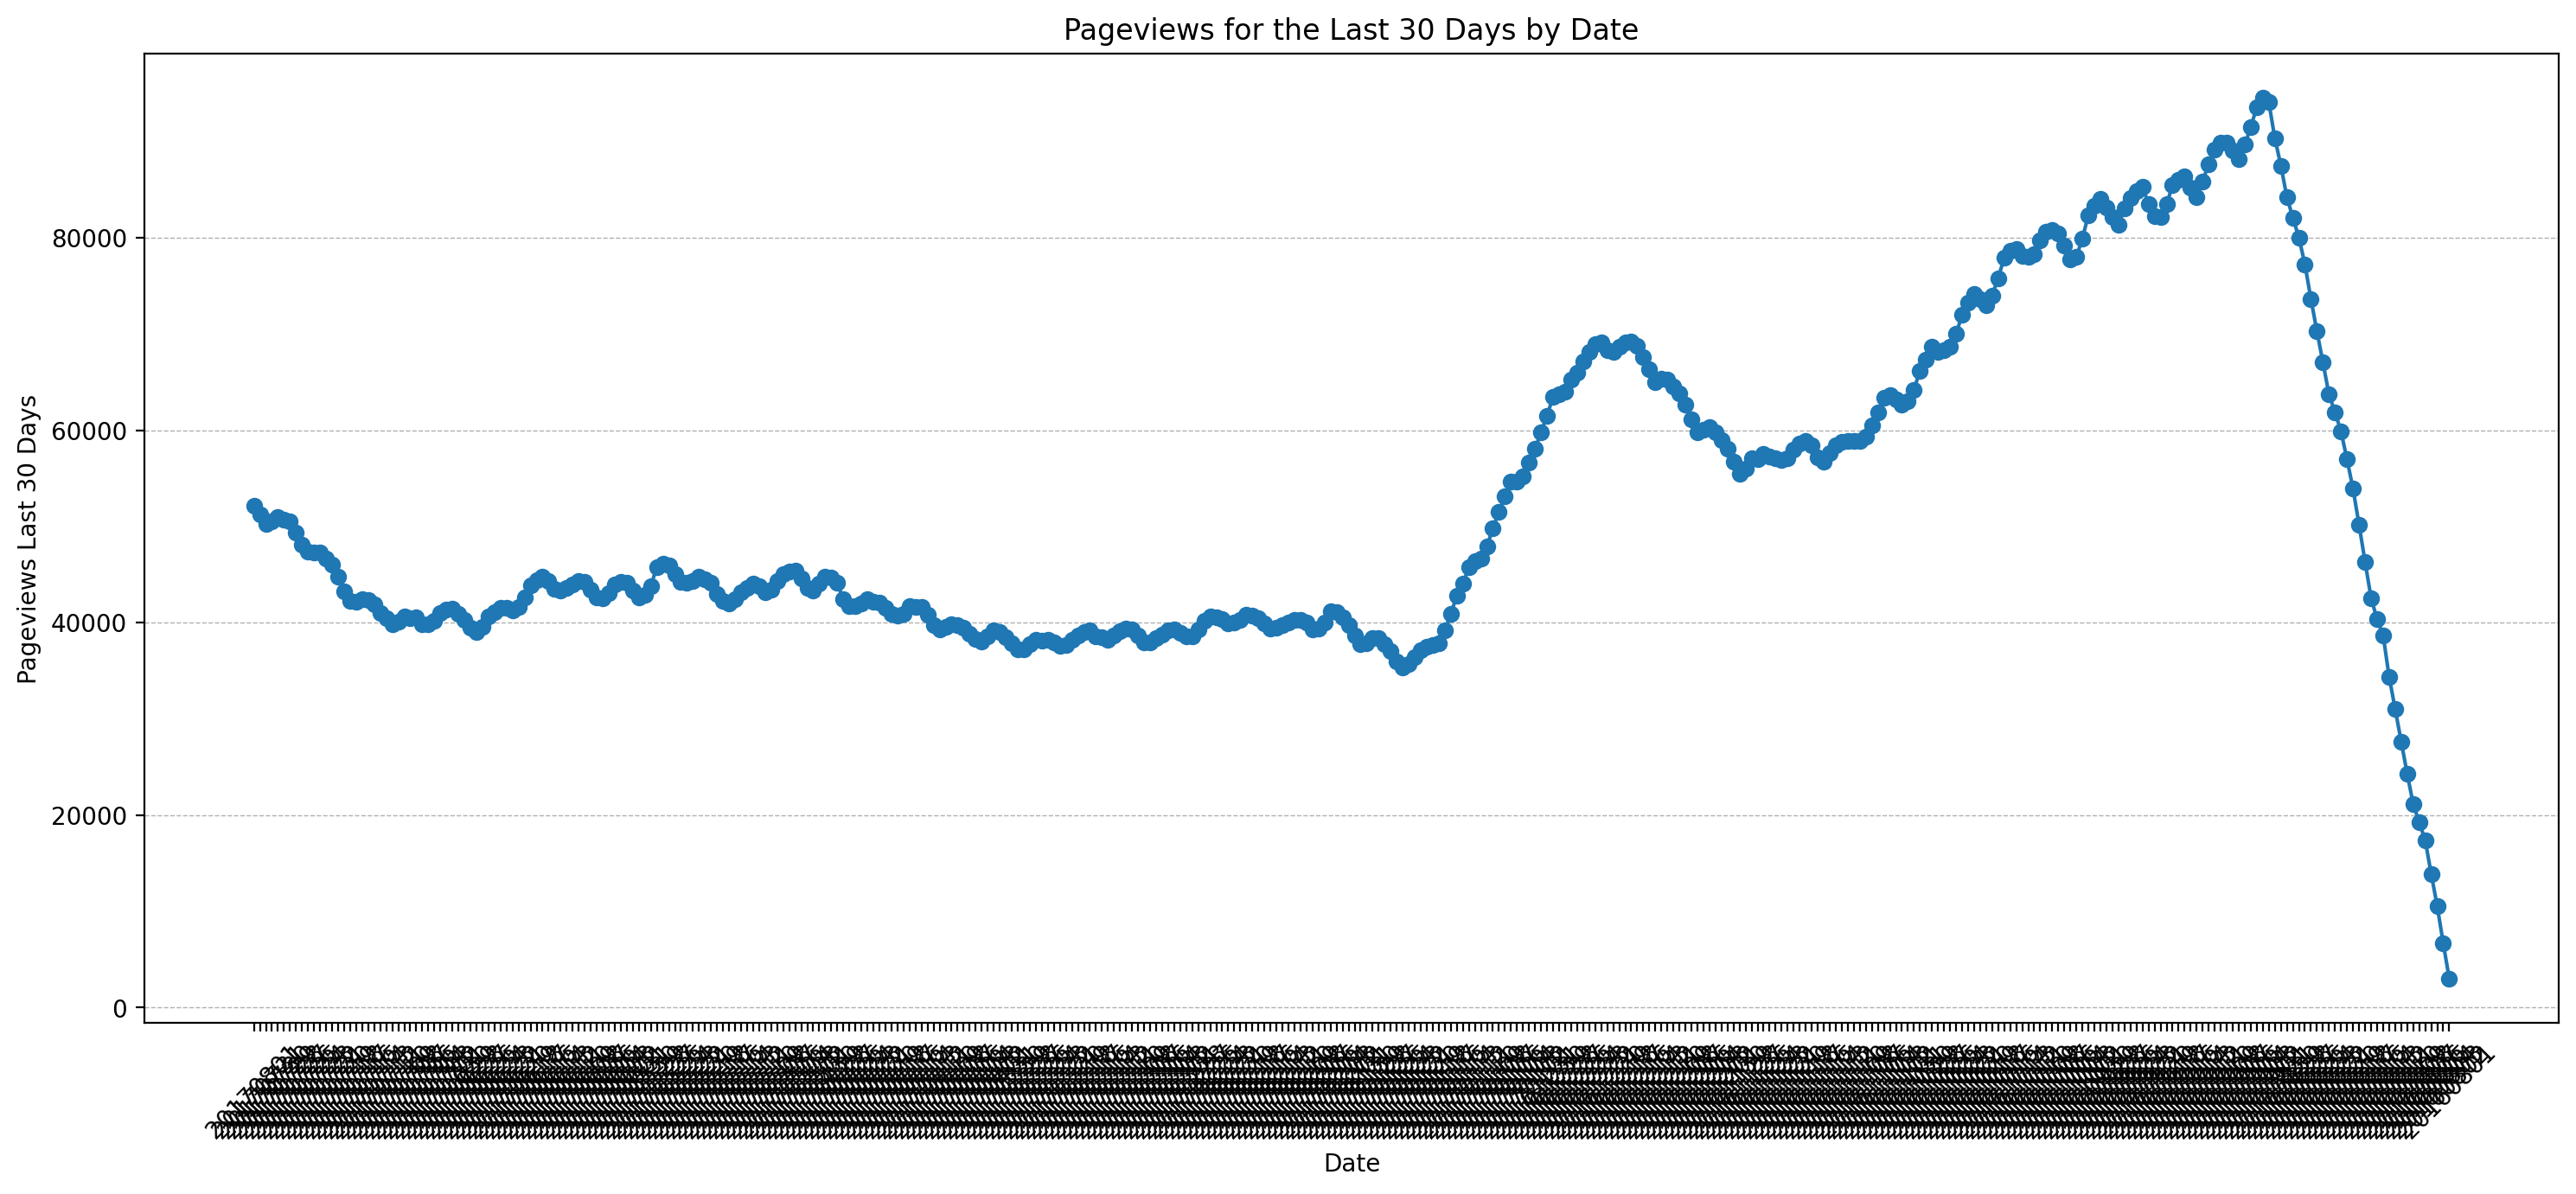

In [37]:
# Plotting the data

plt.figure(figsize=(15, 7))
plt.plot(result['date'], result['pageviews_last_30_days'], marker='o', linestyle='-')
plt.title('Pageviews for the Last 30 Days by Date')
plt.xlabel('Date')
plt.ylabel('Pageviews Last 30 Days')
plt.xticks(rotation=45)
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

월별 페이지뷰 집계

In [38]:
# 쿼리를 정의합니다.
query = """
WITH Last30Days AS (
    SELECT 
        date,
        COUNT(hit.page.pagePath) AS daily_pageviews
    
    FROM 
        `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
        UNNEST(hits) AS hit
    
    WHERE 
        hit.eventInfo.eventAction is not null
        AND DATE_DIFF(CURRENT_DATE(), PARSE_DATE('%Y%m%d', date), DAY) <= 30
    
    GROUP BY 
        date
)

SELECT 
    SUM(daily_pageviews) AS total_pageviews_last_30_days
FROM 
    Last30Days;

"""

# 쿼리를 실행합니다.
result = client.query(query).result().to_dataframe()

print(result)

   total_pageviews_last_30_days
0                           NaN


중복 제거된 페이지뷰 집계

In [39]:
# 쿼리를 정의합니다.
query = """
WITH TotalViews AS (
    SELECT 
        hit.page.pagePath AS page_path,
        COUNT(*) AS total_pageviews
    FROM 
        `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
        UNNEST(hits) AS hit
    WHERE 
        hit.eventInfo.eventAction is not null
    GROUP BY 
        hit.page.pagePath
),
UniqueViews AS (
    SELECT 
        hit.page.pagePath AS page_path,
        COUNT(DISTINCT fullVisitorId) AS unique_pageviews
    FROM 
        `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
        UNNEST(hits) AS hit
    WHERE 
        hit.eventInfo.eventAction is not null
    GROUP BY 
        hit.page.pagePath
)

SELECT 
    t.page_path,
    t.total_pageviews,
    u.unique_pageviews
FROM 
    TotalViews t
JOIN 
    UniqueViews u
ON 
    t.page_path = u.page_path
ORDER BY 
    total_pageviews DESC;

"""

# 쿼리를 실행합니다.
result = client.query(query).result().to_dataframe()

print(result)

                                             page_path  total_pageviews  \
0                                                /home            51999   
1               /google+redesign/shop+by+brand/youtube            36066   
2      /google+redesign/apparel/men++s/men++s+t+shirts            32908   
3                                /google+redesign/bags            28849   
4                                        /asearch.html            23631   
..                                                 ...              ...   
728  /google+redesign/apparel/men+s+google+softshel...                1   
729  /google+redesign/apparel/kids/kids+infant/goog...                1   
730  /google+redesign/apparel/women+s/women+s+t+shi...                1   
731  /google+redesign/apparel/kids/kids+toddler/goo...                1   
732  /google+redesign/apparel/android+mens+engineee...                1   

     unique_pageviews  
0               33060  
1               12034  
2                9637  
3  

체류 시간 집계

In [40]:
# 쿼리를 정의합니다.
query = """
WITH MinMaxHitTime AS (
    SELECT 
        hit.page.pagePath AS page_path,
        fullVisitorId,
        MIN(hit.time) AS min_hit_time,
        MAX(hit.time) AS max_hit_time
    FROM 
        `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
        UNNEST(hits) AS hit
    WHERE 
        hit.eventInfo.eventAction is not null
    GROUP BY 
        hit.page.pagePath, fullVisitorId
),
DwellTime AS (
    SELECT 
        page_path,
        fullVisitorId,
        (max_hit_time - min_hit_time) / 1000.0 AS dwell_time_seconds  -- Convert from milliseconds to seconds
    FROM 
        MinMaxHitTime
)

SELECT 
    page_path,
    AVG(dwell_time_seconds) AS avg_dwell_time_seconds
FROM 
    DwellTime
GROUP BY 
    page_path
ORDER BY 
    avg_dwell_time_seconds DESC;

"""

# 쿼리를 실행합니다.
result = client.query(query).result().to_dataframe()

print(result)

                                             page_path  avg_dwell_time_seconds
0    /google+redesign/apparel/kids/kids+infant/goog...             2086.722500
1    /google+redesign/apparel/women+s+google+1/4+zi...             2074.438000
2                      /google+redesign/office/writing             1355.810000
3    /google+redesign/apparel/kids/kids+toddler/goo...              815.738400
4    /google+redesign/apparel/men+s+t+shirts/androi...              725.842571
..                                                 ...                     ...
728  /google+redesign/apparel/men+s+google+softshel...                0.000000
729  /google+redesign/apparel/men+s+t+shirts/google...                0.000000
730  /google+redesign/apparel/women+s+google+quillt...                0.000000
731  /google+redesign/apparel/men+s+t+shirts/androi...                0.000000
732  /google+redesign/office/writing/parker+gunmeta...                0.000000

[733 rows x 2 columns]


코드 종합

In [41]:
# 쿼리를 정의합니다.
query = """
WITH TotalViews AS (
    SELECT 
        hit.page.pagePath AS page_path,
        COUNT(*) AS total_pageviews
    FROM 
        `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
        UNNEST(hits) AS hit
    WHERE 
        hit.eventInfo.eventAction is not null
    GROUP BY 
        hit.page.pagePath
),
UniqueViews AS (
    SELECT 
        hit.page.pagePath AS page_path,
        COUNT(DISTINCT fullVisitorId) AS unique_pageviews
    FROM 
        `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
        UNNEST(hits) AS hit
    WHERE 
        hit.eventInfo.eventAction is not null
    GROUP BY 
        hit.page.pagePath
),
MinMaxHitTime AS (
    SELECT 
        hit.page.pagePath AS page_path,
        fullVisitorId,
        MIN(hit.time) AS min_hit_time,
        MAX(hit.time) AS max_hit_time
    FROM 
        `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
        UNNEST(hits) AS hit
    WHERE 
        hit.eventInfo.eventAction is not null
    GROUP BY 
        hit.page.pagePath, fullVisitorId
),
DwellTime AS (
    SELECT 
        page_path,
        fullVisitorId,
        (max_hit_time - min_hit_time) / 1000.0 AS dwell_time_seconds  -- Convert from milliseconds to seconds
    FROM 
        MinMaxHitTime
)

SELECT 
    t.page_path,
    t.total_pageviews,
    u.unique_pageviews,
    AVG(d.dwell_time_seconds) AS avg_dwell_time_seconds
FROM 
    TotalViews t
JOIN 
    UniqueViews u ON t.page_path = u.page_path
JOIN 
    DwellTime d ON t.page_path = d.page_path
GROUP BY 
    t.page_path, t.total_pageviews, u.unique_pageviews
ORDER BY 
    total_pageviews DESC;
"""

# 쿼리를 실행합니다.
result = client.query(query).result().to_dataframe()

print(result)

                                             page_path  total_pageviews  \
0                                                /home            51999   
1               /google+redesign/shop+by+brand/youtube            36066   
2      /google+redesign/apparel/men++s/men++s+t+shirts            32908   
3                                /google+redesign/bags            28849   
4                                        /asearch.html            23631   
..                                                 ...              ...   
728  /google+redesign/apparel/women+s+t+shirts/yout...                1   
729  /google+redesign/apparel/headgear/android+stre...                1   
730  /google+redesign/apparel/mens+outerwear/mens+g...                1   
731  /google+redesign/apparel/women+s/women+s+t+shi...                1   
732  /google+redesign/apparel/men+s+t+shirts/google...                1   

     unique_pageviews  avg_dwell_time_seconds  
0               33060               55.018720  
1  

고객의 행동 패턴 파악

In [42]:
# 쿼리를 정의합니다.
query = """
WITH HitTimeData AS (
    SELECT 
        visitId,
        fullVisitorId AS sess_id,
        hit.hitNumber AS hit_seq,
        hit.page.pagePath AS page_path,
        hit.time AS hit_time,
        CASE WHEN LEAD(hit.hitNumber) OVER(PARTITION BY fullVisitorId ORDER BY hit.hitNumber) = hit.hitNumber + 1
             THEN LEAD(hit.time) OVER(PARTITION BY fullVisitorId ORDER BY hit.hitNumber)
             ELSE NULL
        END AS next_hit_time
    FROM 
        `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
        UNNEST(hits) AS hit
    WHERE 
        fullVisitorId = '0000010278554503158' 
)

SELECT 
    sess_id,
    page_path,
    hit_seq,
    hit_time,
    next_hit_time,
    (next_hit_time - hit_time) / 1000.0 AS dwell_time_seconds  -- Convert from milliseconds to seconds
FROM 
    HitTimeData
ORDER BY 
    sess_id, hit_seq
LIMIT 100;

"""

# 쿼리를 실행합니다.
result = client.query(query).result().to_dataframe()

print(result)

                sess_id                                          page_path  \
0   0000010278554503158                                              /home   
1   0000010278554503158                 /google+redesign/electronics/power   
2   0000010278554503158              /google+redesign/accessories/stickers   
3   0000010278554503158    /google+redesign/accessories/stickers/quickview   
4   0000010278554503158              /google+redesign/accessories/stickers   
5   0000010278554503158    /google+redesign/accessories/stickers/quickview   
6   0000010278554503158              /google+redesign/accessories/stickers   
7   0000010278554503158              /google+redesign/accessories/stickers   
8   0000010278554503158  /google+redesign/office/stickers/youtube+custo...   
9   0000010278554503158               /store-policies/shipping-information   
10  0000010278554503158                    /google+redesign/bags/backpacks   

    hit_seq  hit_time  next_hit_time  dwell_time_seconds  
0   

특정 월 전체 고객 패턴 검색

In [43]:
# 쿼리를 정의합니다.
query = """
WITH HitTimeData AS (
    SELECT 
        visitId,
        fullVisitorId AS sess_id,
        hit.hitNumber AS hit_seq,
        hit.page.pagePath AS page_path,
        hit.time AS hit_time,
        CASE WHEN LEAD(hit.hitNumber) OVER(PARTITION BY fullVisitorId ORDER BY hit.hitNumber) = hit.hitNumber + 1
             THEN LEAD(hit.time) OVER(PARTITION BY fullVisitorId ORDER BY hit.hitNumber)
             ELSE NULL
        END AS next_hit_time
    FROM 
        `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
        UNNEST(hits) AS hit
    WHERE 
        EXTRACT(YEAR FROM PARSE_DATE('%Y%m%d', date)) = 2016
        AND EXTRACT(MONTH FROM PARSE_DATE('%Y%m%d', date)) = 10
)

SELECT 
    sess_id,
    page_path,
    hit_seq,
    hit_time,
    next_hit_time,
    (next_hit_time - hit_time) / 1000.0 AS dwell_time_seconds  -- Convert from milliseconds to seconds
FROM 
    HitTimeData
ORDER BY 
    sess_id, hit_seq
LIMIT 100;

"""

# 쿼리를 실행합니다.
result = client.query(query).result().to_dataframe()

print(result)

                sess_id                                        page_path  \
0   0000010278554503158                                            /home   
1   0000010278554503158               /google+redesign/electronics/power   
2   0000010278554503158            /google+redesign/accessories/stickers   
3   0000010278554503158  /google+redesign/accessories/stickers/quickview   
4   0000010278554503158            /google+redesign/accessories/stickers   
..                  ...                                              ...   
95  0002519782765134864        /google+redesign/bags/backpacks/quickview   
96  0002519782765134864                  /google+redesign/bags/backpacks   
97  0002519782765134864        /google+redesign/bags/backpacks/quickview   
98  0002519782765134864                  /google+redesign/bags/backpacks   
99  0002519782765134864  /google+redesign/bags/backpacks/google+rucksack   

    hit_seq  hit_time  next_hit_time  dwell_time_seconds  
0         1         0       

## Bounce 세션에 대해서 알아보기

In [44]:
# 쿼리를 정의합니다.
query = """
WITH PageViewCounts AS (
    SELECT 
        fullVisitorId AS sess_id,
        COUNT(DISTINCT hit.page.pagePath) AS page_view_count
    FROM 
        `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
        UNNEST(hits) AS hit
    WHERE 
        hit.eventInfo.eventAction is not null
    GROUP BY 
        fullVisitorId
)

, BounceCounts AS (
    SELECT 
        COUNT(DISTINCT sess_id) AS bounce_sessions
    FROM 
        PageViewCounts
    WHERE 
        page_view_count = 1
)

, TotalSessions AS (
    SELECT 
        COUNT(DISTINCT sess_id) AS total_sessions
    FROM 
        PageViewCounts
)

SELECT 
    total_sessions,
    bounce_sessions,
    (bounce_sessions / total_sessions * 100) AS bounce_rate_percent
FROM 
    TotalSessions, BounceCounts;

"""

# 쿼리를 실행합니다.
result = client.query(query).result().to_dataframe()

print(result)

   total_sessions  bounce_sessions  bounce_rate_percent
0          125296            78090            62.324416


중도이탈 고객

In [45]:
# 쿼리를 정의합니다.
query = """
SELECT 
    hit.isExit,
    COUNT(*) AS count
FROM 
    `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
    UNNEST(hits) AS hit
WHERE 
    EXTRACT(YEAR FROM PARSE_DATE('%Y%m%d', date)) = 2016
    AND EXTRACT(MONTH FROM PARSE_DATE('%Y%m%d', date)) = 10
GROUP BY 
    hit.isExit
"""

# 쿼리를 실행합니다.
result = client.query(query).result().to_dataframe()

print(result)

  isExit   count
0   True   97493
1   None  305299


페이지뷰 별 이탈 비율

In [46]:
# 쿼리를 정의합니다.
query = """
WITH SessionData AS (
    -- 2016년 10월 데이터 추출
    SELECT 
        fullVisitorId AS sess_id,
        hit.page.pagePath AS page_path,
        hit.hitNumber AS hit_seq,
        hit.type AS hit_type,
        hit.eventInfo.eventAction AS action_type,
        hit.isExit
    FROM 
        `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
        UNNEST(hits) AS hit
    WHERE 
        EXTRACT(YEAR FROM PARSE_DATE('%Y%m%d', date)) = 2016
        AND EXTRACT(MONTH FROM PARSE_DATE('%Y%m%d', date)) = 10
)

SELECT 
    page_path,
    COUNT(*) AS total_pageviews,
    COUNTIF(isExit) AS exit_pageviews,  -- isExit가 TRUE인 경우만 카운트
    (COUNTIF(isExit) / COUNT(*)) * 100 AS exit_rate_percent
FROM 
    SessionData
GROUP BY 
    page_path
ORDER BY 
    total_pageviews DESC;
"""

# 쿼리를 실행합니다.
result = client.query(query).result().to_dataframe()

print(result)

                                             page_path  total_pageviews  \
0                                                /home           135273   
1                                         /basket.html            19477   
2      /google+redesign/apparel/men++s/men++s+t+shirts            14570   
3                                         /signin.html             9550   
4                                          /store.html             9088   
..                                                 ...              ...   
793  /google+redesign/apparel/men+s+t+shirts/men+s+...                1   
794                               /store-policies/home                1   
795      /google+redesign/apparel/ladies+t-shirts/home                1   
796  /google+redesign/fruit+games/google+adult+tee+...                1   
797                      /google+redesign/bags/android                1   

     exit_pageviews  exit_rate_percent  
0             59426          43.930422  
1              17